In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy.stats import uniform, randint

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 윈도우용 한글깨짐 방지
from matplotlib import font_manager, rc
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)

In [4]:
crime_df = pd.read_csv("./totalData3.csv",encoding="CP949")

In [5]:
crime_df.head()

자치구  14'발생    14'검거율  15'발생    15'검거율  16'발생    16'검거율  17'발생    17'검거율  \
0  종로구   5021  0.918144   4705  0.941552   4459  0.963893   4057  1.093665   
1   중구   5231  0.609444   4954  0.593864   4584  0.669284   4184  0.681405   
2  용산구   3799  0.615952   3820  0.650000   4137  0.685279   4060  0.723153   
3  성동구   3582  0.571748   3358  0.632222   3026  0.790482   2767  0.734008   
4  광진구   6268  0.563338   5909  0.627348   5322  0.622322   4646  0.707921   

   18'발생  ...  22'외국인 인구수  14'평균연령  15'평균연령  16'평균연령  17'평균연령  18'평균연령  \
0   3690  ...        9106     42.5     42.9     43.4     43.7     44.2   
1   4030  ...        9288     42.9     43.4     43.8     44.1     44.5   
2   3411  ...       14332     41.8     42.3     42.7     43.2     43.6   
3   2457  ...        6682     40.5     40.9     41.3     41.6     42.0   
4   3915  ...       12631     39.5     40.0     40.5     40.9     41.4   

   19'평균연령  20'평균연령  21'평균연령  22'평균연령  
0     44.7     45.2     45.4     45.6  
1     45.0     45.6     45.8     46.1  
2     43.9     44.3     44.3     44.4  
3     42.4     43.0     43.4     43.8  
4     41.9     42.4     42.9     43.3  

[5 rows x 199 columns]

In [6]:
crime_df.shape

(25, 199)

In [7]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Columns: 199 entries, 자치구 to 22'평균연령
dtypes: float64(126), int64(72), object(1)
memory usage: 39.0+ KB


# 이 바로 밑에거는 전체를 실행하는거라 본인이 맡은 부분만 data_list에 넣어주시면 이거는 따로 실행할 필요 없어요

In [8]:
data = []
crime_df.columns
for i in crime_df.columns[1:]:
    data.append(i[3:])
# data
data_set = set(data)
data_set
data_list = list(data_set)
print(data_list)
print(len(data_list)) # data_list 14~22년도를 한 번에 묶은 리스트 


['최대 순간 풍속', '유흥주점', '행복지수', '발생', 'cctv', '인구', '지가변동평균', '인구밀도', '최저기온', '파출소현황', '최고기온', '평균기온', '검거율', '평균최저기온', '우울감 경험률', '평균최고기온', '강수량합', '평균연령', '외국인 인구수', '평균 풍속', '경찰관', '월간 음주율']
22


# 맡은 부분 나눠서 데이터 분석

In [9]:
data_list = ['최저기온', '평균최저기온', '최고기온' ,  '평균기온', '평균최고기온','평균 풍속','최대 순간 풍속' ,'강수량합','지가변동평균' ]

In [10]:
df_list = [] 
df = pd.DataFrame(zip(crime_df["자치구"]))
df.rename(columns={0:"자치구"},inplace =True) 
for i in data_list:    
    for j in range(14,23):
        df = pd.concat([df,crime_df.loc[:,f"{j}'{i}"].to_frame()],axis=1)
    
df.set_index("자치구",inplace = True)
df.head()

14'최저기온  15'최저기온  16'최저기온  17'최저기온  18'최저기온  19'최저기온  20'최저기온  21'최저기온  \
자치구                                                                           
종로구    -13.2    -13.0    -18.0    -12.6    -17.8    -10.9    -12.9    -18.6   
중구     -13.8    -13.5    -18.9    -13.9    -19.6    -12.7    -14.7    -20.1   
용산구    -11.7    -11.1    -16.7    -11.4    -17.2    -10.4    -12.5    -18.0   
성동구    -10.5    -10.2    -15.7    -10.2    -16.2     -9.0    -11.0    -16.0   
광진구    -11.2    -10.4    -21.7    -10.8    -16.7     -9.5    -11.9    -17.1   

     22'최저기온  14'평균최저기온  ...  22'강수량합  14'지가변동평균  15'지가변동평균  16'지가변동평균  \
자치구                      ...                                             
종로구    -13.7        9.3  ...   1775.3      2.410      1.903      2.199   
중구     -15.8        8.5  ...   1452.5      2.563      1.806      2.227   
용산구    -12.4       10.1  ...   1699.0      1.491      1.501      3.133   
성동구    -12.9       10.5  ...   1727.5      1.848      2.218      2.916   
광진구    -12.9       10.2  ...   1918.0      1.822      2.551      3.182   

     17'지가변동평균  18'지가변동평균  19'지가변동평균  20'지가변동평균  21'지가변동평균  22'지가변동평균  
자치구                                                                    
종로구      3.284      5.811      4.457      4.316      5.006      3.045  
중구       3.244      5.327      4.763      4.551      4.882      2.366  
용산구      5.225      8.598      5.860      4.854      5.507      3.255  
성동구      5.221      7.377      5.882      5.129      6.173      4.528  
광진구      4.343      5.679      5.324      4.398      5.037      2.581  

[5 rows x 81 columns]

# 결측치 확인

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 종로구 to 강동구
Data columns (total 81 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   14'최저기온      25 non-null     float64
 1   15'최저기온      25 non-null     float64
 2   16'최저기온      25 non-null     float64
 3   17'최저기온      25 non-null     float64
 4   18'최저기온      25 non-null     float64
 5   19'최저기온      25 non-null     float64
 6   20'최저기온      25 non-null     float64
 7   21'최저기온      25 non-null     float64
 8   22'최저기온      25 non-null     float64
 9   14'평균최저기온    25 non-null     float64
 10  15'평균최저기온    25 non-null     float64
 11  16'평균최저기온    25 non-null     float64
 12  17'평균최저기온    23 non-null     float64
 13  18'평균최저기온    25 non-null     float64
 14  19'평균최저기온    24 non-null     float64
 15  20'평균최저기온    25 non-null     float64
 16  21'평균최저기온    22 non-null     float64
 17  22'평균최저기온    24 non-null     float64
 18  14'최고기온      25 non-null     float64
 19  15'최고기온     

In [12]:
df.isna().sum().loc[df.isna().sum() >= 1]

17'평균최저기온      2
19'평균최저기온      1
21'평균최저기온      3
22'평균최저기온      1
17'평균기온        2
19'평균기온        1
21'평균기온        3
22'평균기온        1
17'평균최고기온      2
19'평균최고기온      1
21'평균최고기온      3
22'평균최고기온      1
17'평균 풍속       1
19'평균 풍속       1
20'평균 풍속       1
21'평균 풍속       3
22'평균 풍속       1
18'최대 순간 풍속    1
19'최대 순간 풍속    1
20'최대 순간 풍속    1
21'최대 순간 풍속    1
22'최대 순간 풍속    1
dtype: int64

## 날씨 데이터의 결측치가 있는 부분은 전후년도 값 평균으로 대체하겠음
- 도봉구 같은 경우는 22년에 결측치가 있어 주변구들의 22년 측정값과 도봉구 전년도 평균값으로 대체하겠음
- 평균 풍속도 마찬가지로 실행
- 순간 최대 풍속은 주변구들의 평균으로 설정

In [13]:
df[["17'평균최저기온","19'평균최저기온","21'평균최저기온","22'평균최저기온"]]

17'평균최저기온  19'평균최저기온  21'평균최저기온  22'평균최저기온
자치구                                             
종로구         8.8       9.30       9.60        9.2
중구          8.2       8.50       8.60        8.2
용산구         9.7      10.30      10.20        9.8
성동구        10.4      10.90        NaN       11.0
광진구         9.2       9.50       9.80        9.3
동대문구        9.6      10.20      10.10        9.7
중랑구         9.6      10.20      10.40        9.9
성북구         8.6       9.00       8.60        8.6
강북구         9.3       9.70       9.80        9.0
도봉구         7.5       7.70       8.40        NaN
노원구         5.4       5.90       6.50        5.8
은평구         NaN       6.00       6.40        5.7
서대문구        8.2       8.80       8.70        8.2
마포구         9.3       9.90        NaN        9.5
양천구         9.9      10.50      10.70       10.2
강서구         NaN       9.00       9.10        8.5
구로구         8.5       9.10       9.60        9.1
금천구         9.5      10.70      10.60       10.1
영등포구       10.3      10.85      10.85       10.4
동작구         8.5       8.65       9.15        8.3
관악구         7.5       7.90       8.00        7.2
서초구         8.8       9.20       9.30        8.9
강남구        10.0        NaN       9.70        9.2
송파구        10.0      10.60      10.50       10.1
강동구         8.5       9.10        NaN        8.9

In [14]:
df[["17'평균기온","19'평균기온","21'평균기온","22'평균기온"]]

17'평균기온  19'평균기온  21'평균기온  22'평균기온
자치구                                     
종로구     13.00    13.50     13.7    13.20
중구      12.10    12.50     12.6    11.80
용산구     13.70    14.30     14.2    13.80
성동구     14.00    14.50      NaN    14.50
광진구     13.30    13.90     14.0    13.40
동대문구    13.50    14.20     14.2    13.70
중랑구     13.60    14.20     14.4    13.80
성북구     12.70    13.30     12.6    12.60
강북구     13.30    14.00     14.1    13.20
도봉구     12.30    12.90     13.1      NaN
노원구     11.70    12.30     12.3    11.80
은평구       NaN    11.70     12.0    11.30
서대문구    12.60    13.20     13.0    12.40
마포구     13.20    13.90      NaN    13.40
양천구     13.70    14.40     14.7    14.00
강서구       NaN    13.50     13.7    13.10
구로구     12.80    13.60     14.0    13.40
금천구     13.30    14.30     14.4    13.70
영등포구    13.85    14.45     14.5    13.90
동작구     13.20    13.40     13.8    12.85
관악구     12.05    12.50     12.6    11.60
서초구     13.50    13.90     14.0    13.40
강남구     13.70      NaN     14.2    13.70
송파구     13.90    14.50     14.6    14.00
강동구     12.90    13.60      NaN    13.30

In [15]:
df[["17'평균최고기온","19'평균최고기온","21'평균최고기온","22'평균최고기온"]]

17'평균최고기온  19'평균최고기온  21'평균최고기온  22'평균최고기온
자치구                                             
종로구       18.10      18.50      18.50      18.00
중구        17.40      17.90      17.70      16.90
용산구       18.20      18.90      19.00      18.40
성동구       18.10      18.60        NaN      18.80
광진구       18.00      18.70      19.00      18.40
동대문구      18.10      18.90      19.00      18.50
중랑구       18.10      18.80      18.90      18.30
성북구       17.30      18.10      17.00      16.90
강북구       18.00      18.90      19.00      18.10
도봉구       17.60      18.60      18.90        NaN
노원구       17.80      18.60      18.60      18.10
은평구         NaN      18.10      18.30      17.50
서대문구      18.00      18.90      18.30      17.70
마포구       18.20      19.00        NaN      18.60
양천구       18.30      19.10      19.40      18.60
강서구         NaN      18.50      19.00      18.60
구로구       17.90      18.70      18.90      18.30
금천구       17.70      18.70      18.90      18.30
영등포구      18.20      18.80      18.95      18.25
동작구       18.35      18.85      19.25      18.25
관악구       17.20      17.80      18.10      17.10
서초구       18.50      19.00      19.10      18.50
강남구       18.00        NaN      19.50      18.80
송파구       18.50      19.10      19.20      18.50
강동구       18.00      18.60        NaN      18.40

In [16]:
def mean_jachigu(column):
    df.loc["은평구",f"17'{column}"] = df.loc["은평구",[f"16'{column}",f"18'{column}"]].mean()
    df.loc["도봉구",f"22'{column}"] = (df.loc[["노원구","강북구"],f"22'{column}"].sum() + df.loc["도봉구",f"21'{column}"]) / 3
    df.loc["성동구",f"21'{column}"] = df.loc["성동구",[f"20'{column}",f"22'{column}"]].mean()
    df.loc["마포구",f"21'{column}"] = df.loc["마포구",[f"20'{column}",f"22'{column}"]].mean()
    df.loc["강서구",f"17'{column}"] = df.loc["강서구",[f"16'{column}",f"18'{column}"]].mean()
    df.loc["강남구",f"19'{column}"] = df.loc["강남구",[f"18'{column}",f"20'{column}"]].mean()
    df.loc["강동구",f"21'{column}"] = df.loc["강동구",[f"20'{column}",f"22'{column}"]].mean()

In [17]:
mean_jachigu("평균최고기온")
mean_jachigu("평균기온")
mean_jachigu("평균최저기온")

In [18]:
df[["17'평균 풍속","19'평균 풍속","20'평균 풍속","21'평균 풍속","22'평균 풍속"]]

17'평균 풍속  19'평균 풍속  20'평균 풍속  21'평균 풍속  22'평균 풍속
자치구                                                   
종로구       2.20      2.00      2.40      2.30       2.4
중구        1.90      1.90      1.90      2.30       2.5
용산구       1.70      1.70      1.90      1.90       1.9
성동구       2.10      1.90      2.00       NaN       1.9
광진구       1.60      1.50      1.50      1.50       1.5
동대문구      1.70      1.70      1.70      1.70       1.7
중랑구       2.00      1.90      2.00      1.90       1.9
성북구       1.60      1.50      1.60      1.60       1.6
강북구       1.90      1.80      1.90      1.80       1.8
도봉구       1.10      1.10      1.20      1.10       1.2
노원구       1.20      1.10      1.20      1.20       1.1
은평구       0.80      0.90       NaN      1.00       1.0
서대문구      1.30      1.30      1.30      1.40       1.3
마포구       2.60      2.40      2.60       NaN       2.6
양천구       1.30      1.30      1.40      1.20       1.4
강서구        NaN      1.60      1.70      1.50       1.5
구로구       2.00      1.90      2.10      2.00       2.1
금천구       1.80      1.70      1.70      1.80       1.9
영등포구      1.75      1.55      1.60      1.70       1.7
동작구       1.30      1.20      1.25      1.50       1.5
관악구       1.55      1.45      1.50      1.55       1.9
서초구       1.60      1.50      1.50      1.50       1.5
강남구       1.70       NaN      1.30      1.20       NaN
송파구       1.60      1.60      1.60      1.60       1.6
강동구       1.30      1.30      1.40       NaN       1.4

In [19]:
df.loc["은평구",f"20'평균 풍속"] = df.loc["은평구",[f"19'평균 풍속",f"21'평균 풍속"]].mean()
df.loc["성동구",f"21'평균 풍속"] = df.loc["성동구",[f"19'평균 풍속",f"21'평균 풍속"]].mean()
df.loc["마포구",f"21'평균 풍속"] = df.loc["마포구",[f"19'평균 풍속",f"21'평균 풍속"]].mean()
df.loc["강서구",f"17'평균 풍속"] = df.loc["강서구",[f"16'평균 풍속",f"18'평균 풍속"]].mean()
df.loc["강남구",f"19'평균 풍속"] = df.loc["강남구",[f"18'평균 풍속",f"20'평균 풍속"]].mean()
df.loc["강남구",f"22'평균 풍속"] = (df.loc[["서초구","송파구","광진구","용산구","성동구"],f"22'평균 풍속"].sum() +df.loc["강남구",f"21'평균 풍속"]) / 6 
df.loc["강동구",f"21'평균 풍속"] = df.loc["강동구",[f"19'평균 풍속",f"21'평균 풍속"]].mean()

In [20]:
df[["18'최대 순간 풍속","19'최대 순간 풍속","20'최대 순간 풍속","21'최대 순간 풍속","22'최대 순간 풍속"]]

18'최대 순간 풍속  19'최대 순간 풍속  20'최대 순간 풍속  21'최대 순간 풍속  22'최대 순간 풍속
자치구                                                                  
종로구           NaN          NaN          NaN          NaN          NaN
중구          15.10        16.10        22.80        23.30        21.60
용산구         16.90        16.10        18.10        20.70        18.40
성동구         21.60        27.90        20.60        17.90        19.90
광진구         11.90        14.00        12.00        11.90        12.40
동대문구        20.80        24.20        19.70        25.60        20.30
중랑구         23.20        27.60        18.00        17.60        16.40
성북구         21.50        25.00        21.30        18.20        18.80
강북구         18.40        26.00        25.20        20.00        16.70
도봉구         13.60        16.70        15.80        45.00        16.90
노원구         15.50        19.70        13.60        17.90        13.70
은평구         13.60        13.00        15.50        12.50        13.30
서대문구        13.00        15.00        15.10        19.40        18.00
마포구         19.00        30.10        17.60        21.80        18.90
양천구         14.80        19.00        10.60        10.20        13.00
강서구         13.30        20.30        13.00        15.90        12.70
구로구         22.50        29.40        21.90        18.30        20.60
금천구         14.90        20.10        14.10        14.10        20.70
영등포구        15.00        15.85        12.65        13.00        43.95
동작구         15.85        19.65        14.95        15.25        14.65
관악구         15.55        17.75        14.40        15.75        13.35
서초구         12.30        13.30        11.90        13.10        14.70
강남구         16.10        13.30        13.40        12.90        19.10
송파구         13.80        17.70        12.10        12.80        11.50
강동구         19.10        24.50        16.90        12.70        17.50

In [21]:
for i in range(18,23):
    df.loc["종로구",f"{i}'최대 순간 풍속"] = df.loc[["중구","성북구","서대문구","은평구"],f"{i}'최대 순간 풍속"].mean()

In [22]:
df.describe()

14'최저기온    15'최저기온    16'최저기온    17'최저기온    18'최저기온    19'최저기온  \
count  25.000000  25.000000  25.000000  25.000000  25.000000  25.000000   
mean  -12.620000 -12.042000 -17.326000 -12.338000 -17.732000 -10.726000   
std     1.582456   1.589135   1.346687   1.878679   1.299189   1.463025   
min   -17.000000 -16.400000 -21.700000 -17.900000 -20.900000 -14.400000   
25%   -13.500000 -13.000000 -17.700000 -12.700000 -18.000000 -11.400000   
50%   -12.100000 -11.500000 -17.000000 -11.700000 -17.200000 -10.200000   
75%   -11.500000 -11.000000 -16.400000 -11.100000 -16.900000  -9.700000   
max   -10.500000 -10.200000 -15.700000 -10.200000 -16.200000  -9.000000   

         20'최저기온    21'최저기온    22'최저기온  14'평균최저기온  ...      22'강수량합  \
count  25.000000  25.000000  25.000000  25.000000  ...    25.000000   
mean  -12.816000 -18.438000 -13.784000   9.236000  ...  1777.058000   
std     1.369285   1.674955   1.303099   1.233771  ...   159.396698   
min   -16.800000 -22.600000 -17.500000   5.900000  ...  1452.500000   
25%   -13.400000 -19.200000 -14.500000   8.800000  ...  1687.000000   
50%   -12.400000 -17.900000 -13.100000   9.700000  ...  1775.300000   
75%   -11.900000 -17.250000 -12.900000  10.200000  ...  1912.500000   
max   -11.000000 -16.000000 -12.400000  10.650000  ...  2074.000000   

       14'지가변동평균  15'지가변동평균  16'지가변동평균  17'지가변동평균  18'지가변동평균  19'지가변동평균  \
count  25.000000  25.000000  25.000000  25.000000  25.000000  25.000000   
mean    2.189720   2.455000   2.783680   4.128840   5.883600   5.048960   
std     0.743767   0.494614   0.438708   0.696762   1.145607   0.583081   
min     1.361000   1.501000   2.199000   3.124000   4.387000   3.827000   
25%     1.822000   2.191000   2.411000   3.697000   5.131000   4.589000   
50%     1.867000   2.420000   2.674000   4.024000   5.694000   5.059000   
75%     2.410000   2.566000   3.127000   4.481000   6.303000   5.536000   
max     4.216000   3.804000   3.821000   5.476000   8.598000   6.052000   

       20'지가변동평균  21'지가변동평균  22'지가변동평균  
count  25.000000  25.000000  25.000000  
mean    4.512360   4.975520   2.725040  
std     0.506013   0.609523   0.728715  
min     3.258000   4.046000   1.734000  
25%     4.337000   4.664000   2.203000  
50%     4.436000   4.962000   2.643000  
75%     4.792000   5.318000   3.125000  
max     5.518000   6.173000   4.528000  

[8 rows x 81 columns]

In [23]:
df_list = []
for i in data_list:
    df_t = pd.DataFrame()
    for j in range(14,23):
        df_t = pd.concat([df_t,df.loc[:,f"{j}'{i}"].to_frame()],axis=1)
    df_list.append(df_t)

## 상대적으로 강수량을 제외한 나머지들은 표준편차가 적어서 평균쪽에 분포되는거 같음

In [24]:
for i in df_list:
    print(i.describe())

         14'최저기온    15'최저기온    16'최저기온    17'최저기온    18'최저기온    19'최저기온  \
count  25.000000  25.000000  25.000000  25.000000  25.000000  25.000000   
mean  -12.620000 -12.042000 -17.326000 -12.338000 -17.732000 -10.726000   
std     1.582456   1.589135   1.346687   1.878679   1.299189   1.463025   
min   -17.000000 -16.400000 -21.700000 -17.900000 -20.900000 -14.400000   
25%   -13.500000 -13.000000 -17.700000 -12.700000 -18.000000 -11.400000   
50%   -12.100000 -11.500000 -17.000000 -11.700000 -17.200000 -10.200000   
75%   -11.500000 -11.000000 -16.400000 -11.100000 -16.900000  -9.700000   
max   -10.500000 -10.200000 -15.700000 -10.200000 -16.200000  -9.000000   

         20'최저기온    21'최저기온    22'최저기온  
count  25.000000  25.000000  25.000000  
mean  -12.816000 -18.438000 -13.784000  
std     1.369285   1.674955   1.303099  
min   -16.800000 -22.600000 -17.500000  
25%   -13.400000 -19.200000 -14.500000  
50%   -12.400000 -17.900000 -13.100000  
75%   -11.900000 -17.250000 -12.90000

# show_plt_part는 본인이 원하는 구들만 보고 싶으시면  data_list에 밑에 보이는 a변수처럼 추가하시고 실행하면 됩니다 
- 여기 i 바꿔주셔야 다른 그래프 그려집니다

In [25]:
def show_plt_part(data_list,i=0):
    fig = plt.figure(figsize = (15,8))
    plt.plot(df_list[i].loc[data_list].T,"D-")
    plt.legend(data_list,loc="upper right")
    plt.title("연도별 흐름")
    plt.xlabel("연도")
    plt.ylabel("수")
    plt.grid(True)
    plt.show()

# show_plt 이거는 전체구를 판단, i는 기본 0이여서 바꿔주셔야 다른 그래프 그려집니다.

In [26]:
def show_plt(i=0):
    fig = plt.figure(figsize = (15,7))
    plt.plot(df_list[i].T,"D-")
    plt.legend(df_list[i].T.columns,loc="upper right")
    plt.title("연도별 흐름")
    plt.xlabel("연도")
    plt.ylabel("수")
    plt.grid(True)
    plt.show()

# 이상치 확인하기

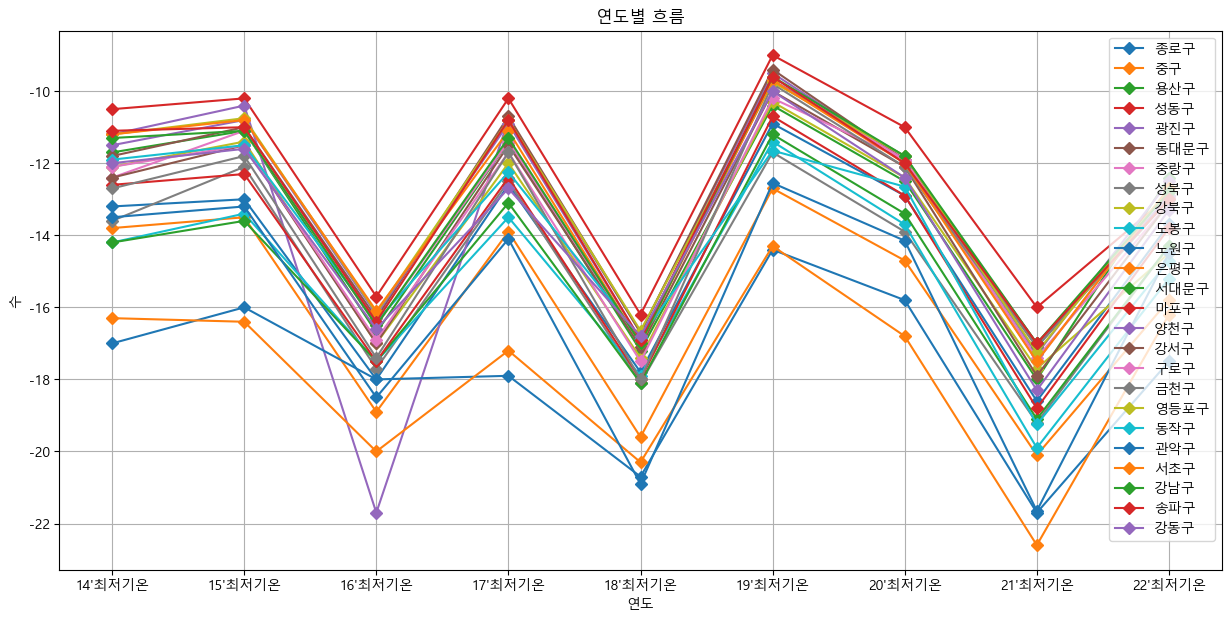

In [27]:
show_plt(0)

- 전체적인 그래프 흐름을 비슷하게 가고있는거 같음
- 16년,18년,21년 한파가 좀 심했다고하는 자료도 있지만 16년도 광진구가 다른 지역에 비해 영향을 많이 받은걸로 생각되어진다.

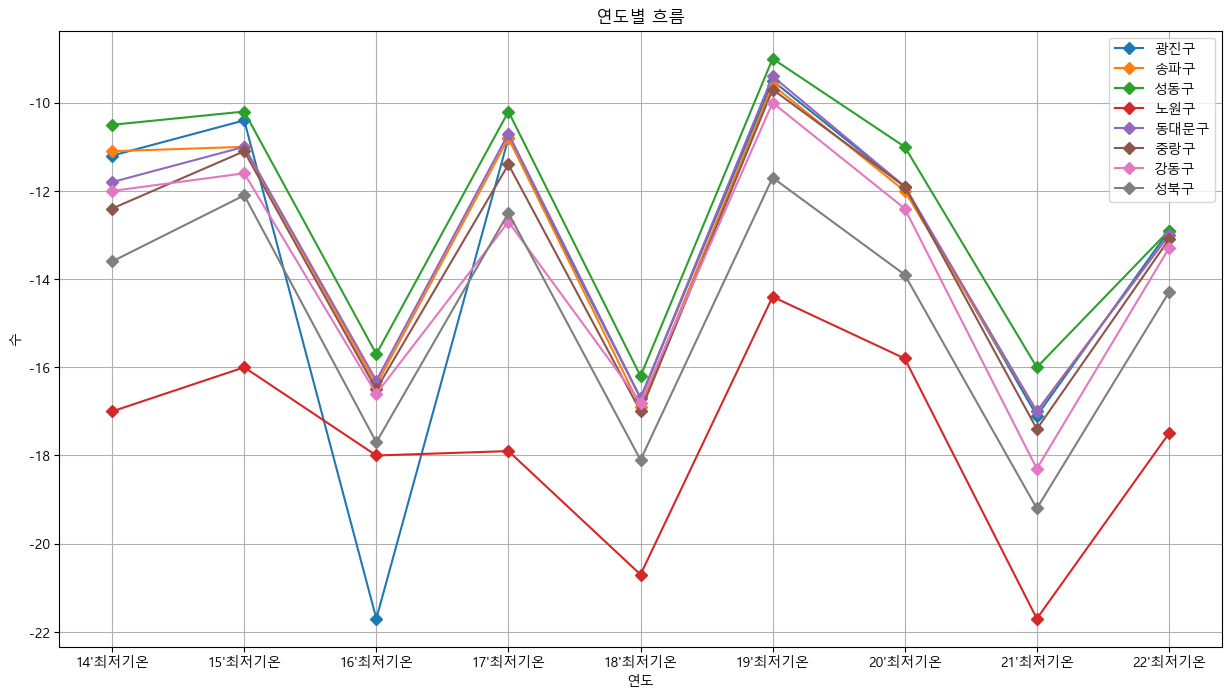

In [28]:
show_plt_part(["광진구","송파구","성동구","노원구","동대문구","중랑구","강동구","성북구"])

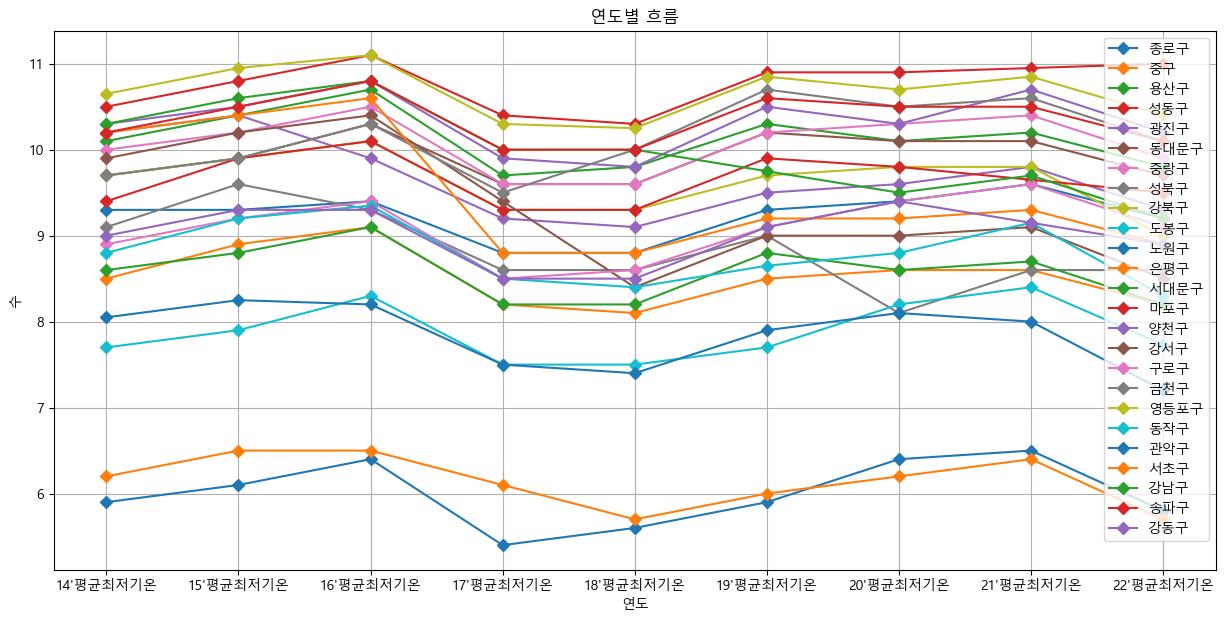

In [29]:
show_plt(1)

- 17 ~ 18년도 겨울 한파 때문에 서초구 급격하게 떨어진걸로 추측 
- 성북구 일단 체크

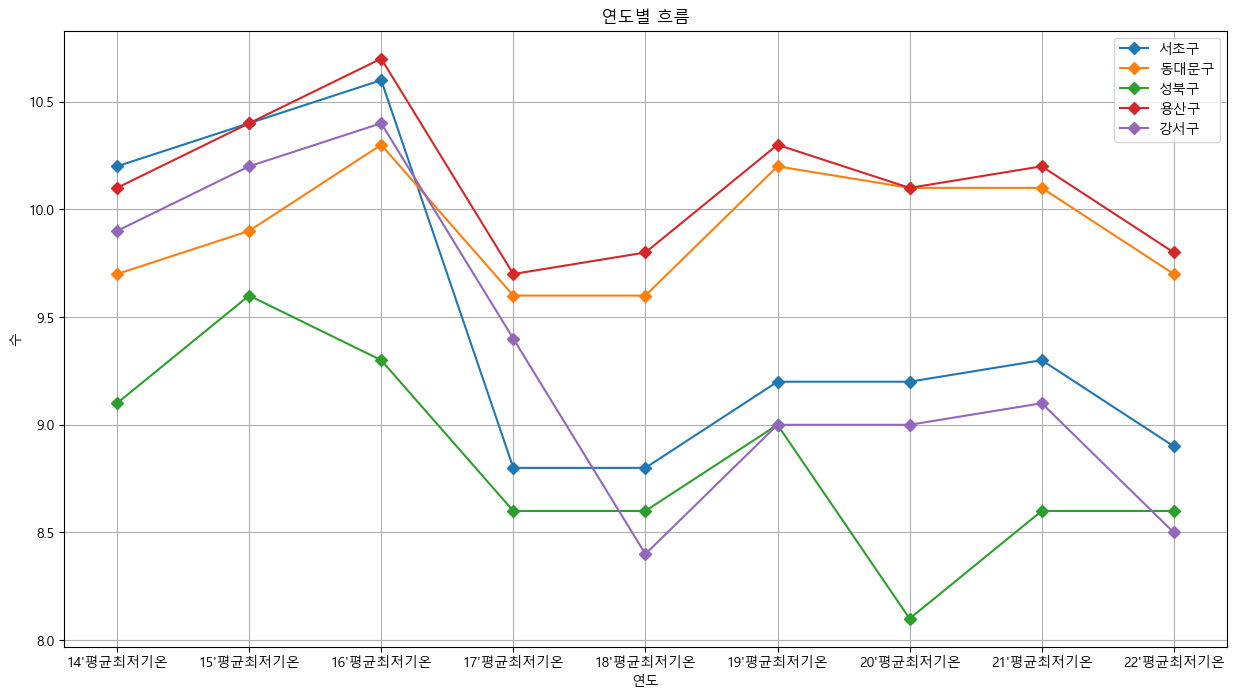

In [30]:
show_plt_part(["서초구","동대문구","성북구","용산구","강서구",],1)

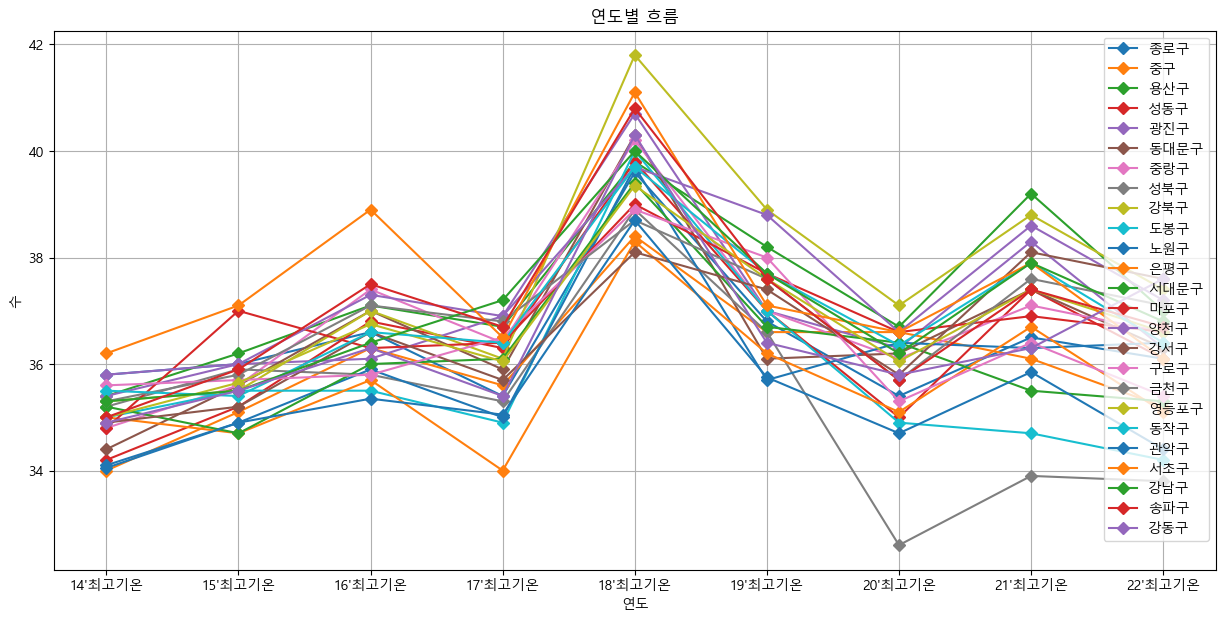

In [31]:
show_plt(2)

- 성북구 20년도 체크

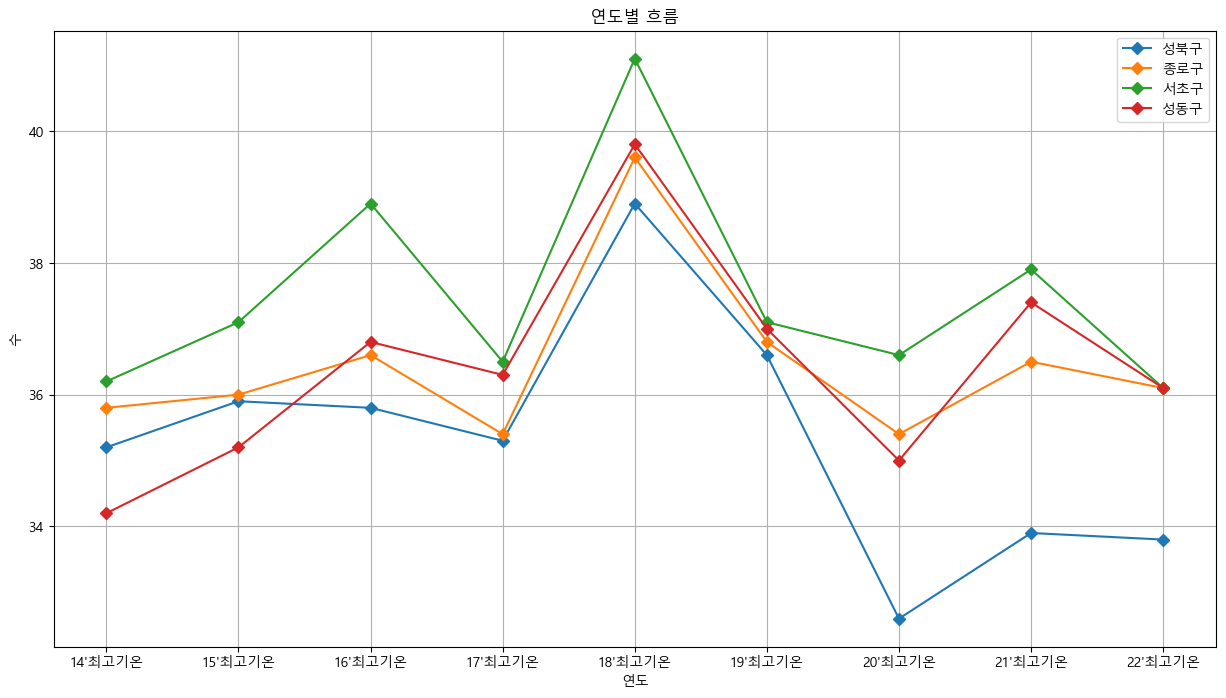

In [32]:
show_plt_part(["성북구","종로구","서초구","성동구"],2)

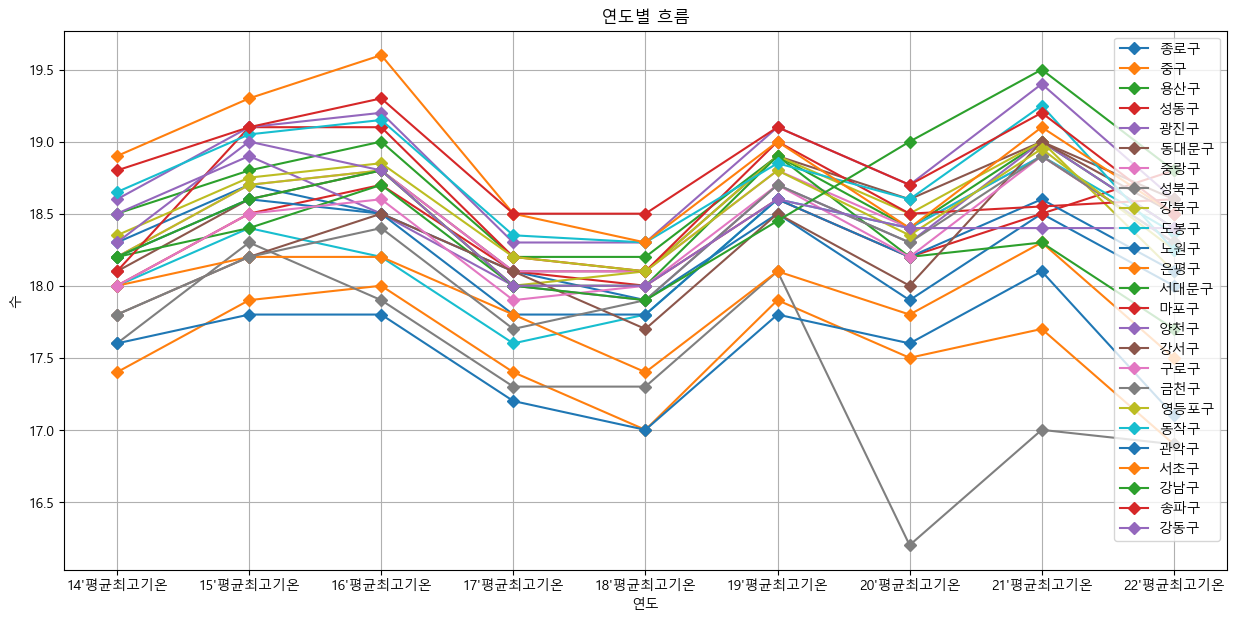

In [33]:
show_plt(4)

- 20년도 성북구 체크

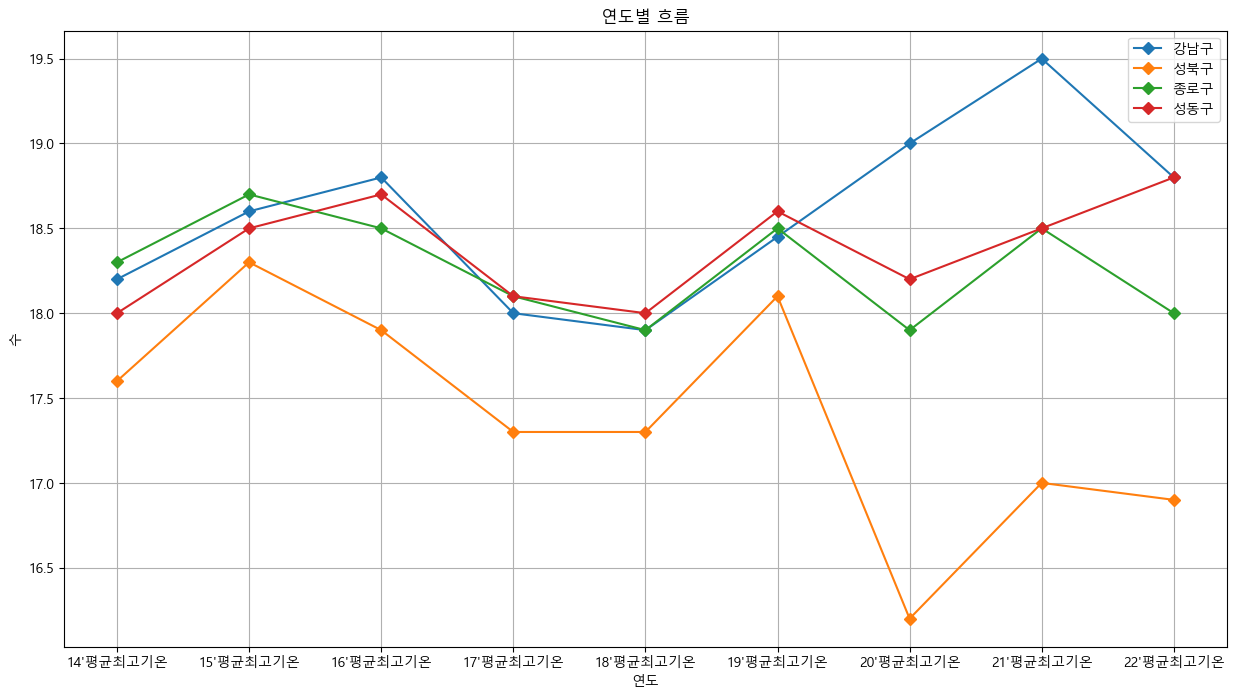

In [34]:
show_plt_part(["강남구","성북구","종로구","성동구"],4)

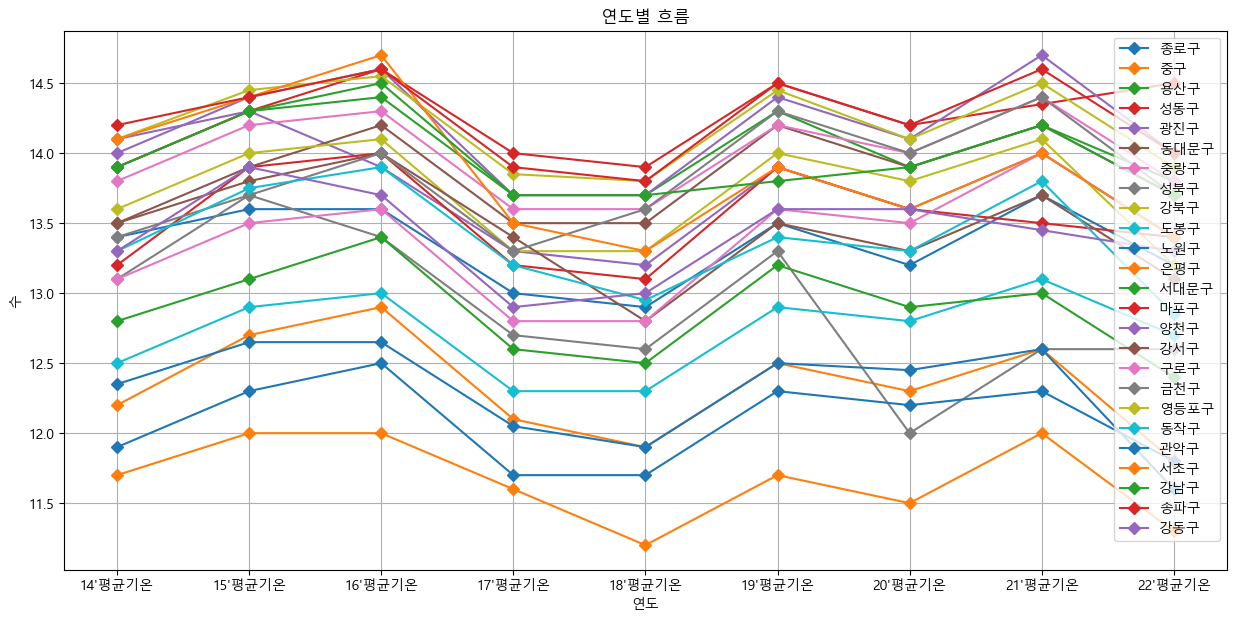

In [35]:
show_plt(3)

- 20년도 성북구 체크

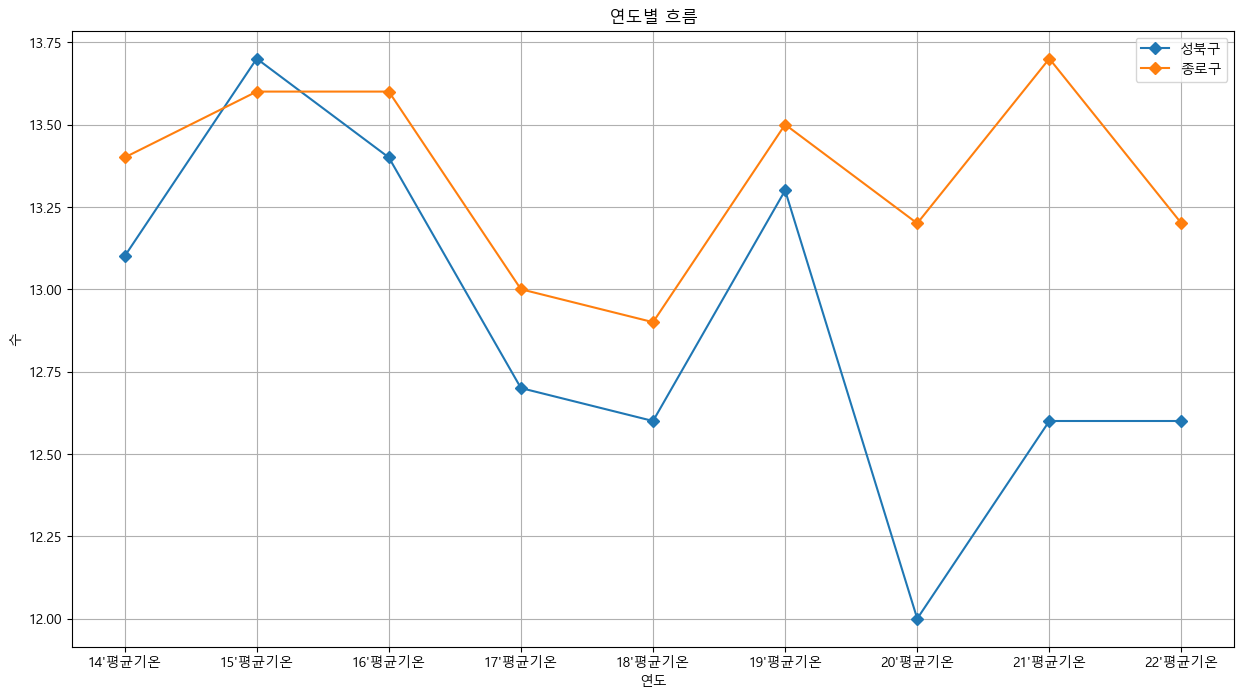

In [36]:
show_plt_part(["성북구","종로구"],3)

- 20년도부터 보면 성북구의 평균기온, 평균최고기온, 최고기운, 평균 최저기온이 급격하게 떨어지는 것이 보인다. 이 4개를 보았을 때 성북구의 최저 온도가 그렇게 낮지 않지만 전체적으로 온도가 낮았다고 볼 수 있을 것 같음

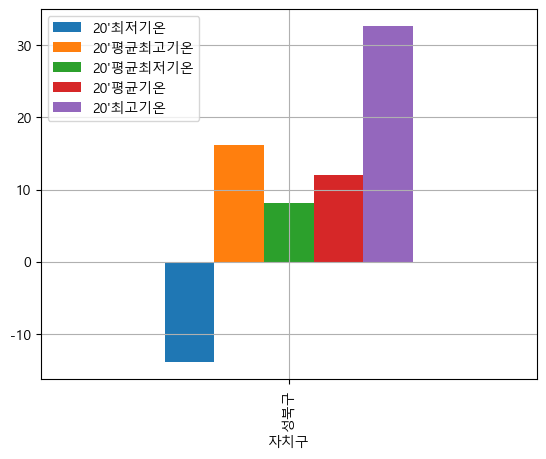

In [37]:
df.loc[["성북구"]].plot(y=["20'최저기온","20'평균최고기온","20'평균최저기온","20'평균기온","20'최고기온"] , kind="bar")
plt.grid(True)
plt.show()

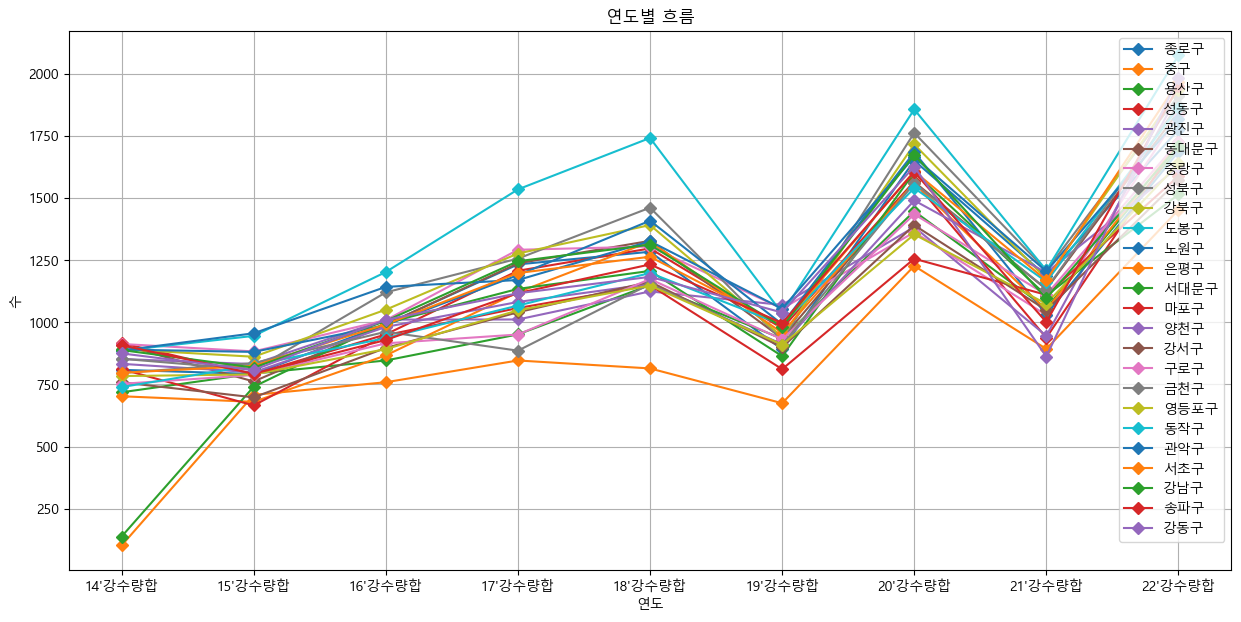

In [38]:
show_plt(7)

- 14년도에 비가 많이 내리지 않았지만 주변구들의 비해 서대문구와 중구의 강수량 차이가 많이 나는 것으로 보임 2개를 이상치로 판단

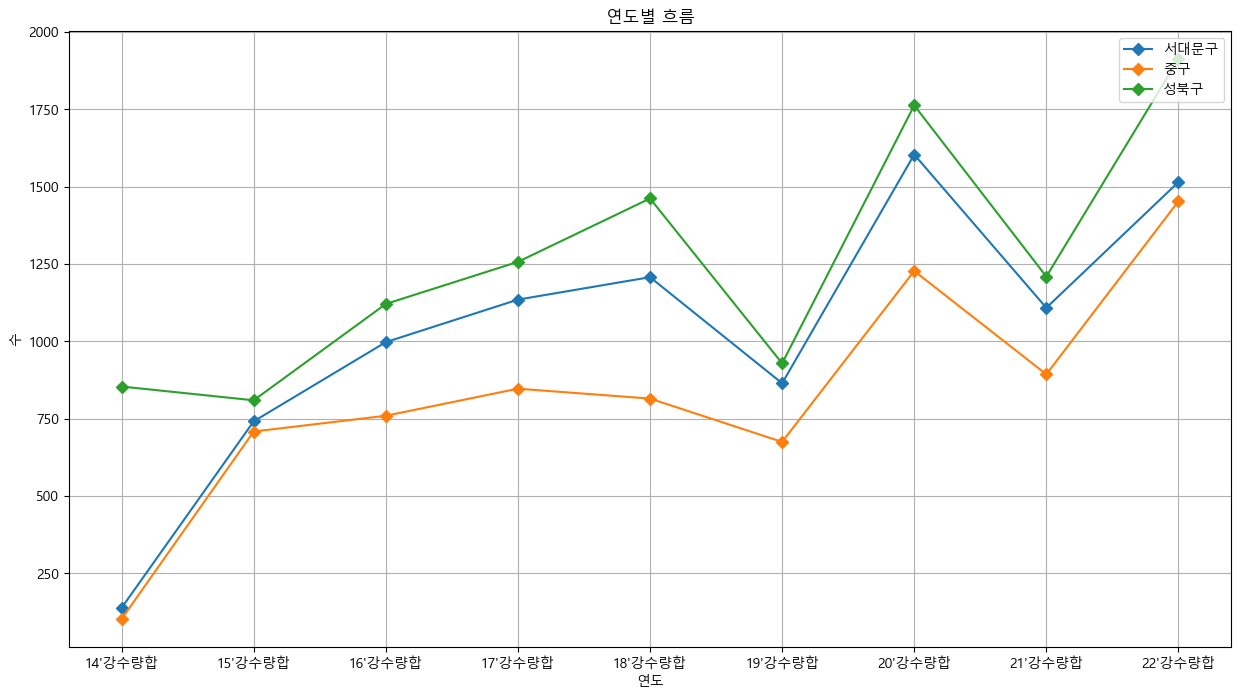

In [39]:
show_plt_part(["서대문구","중구","성북구"],7)

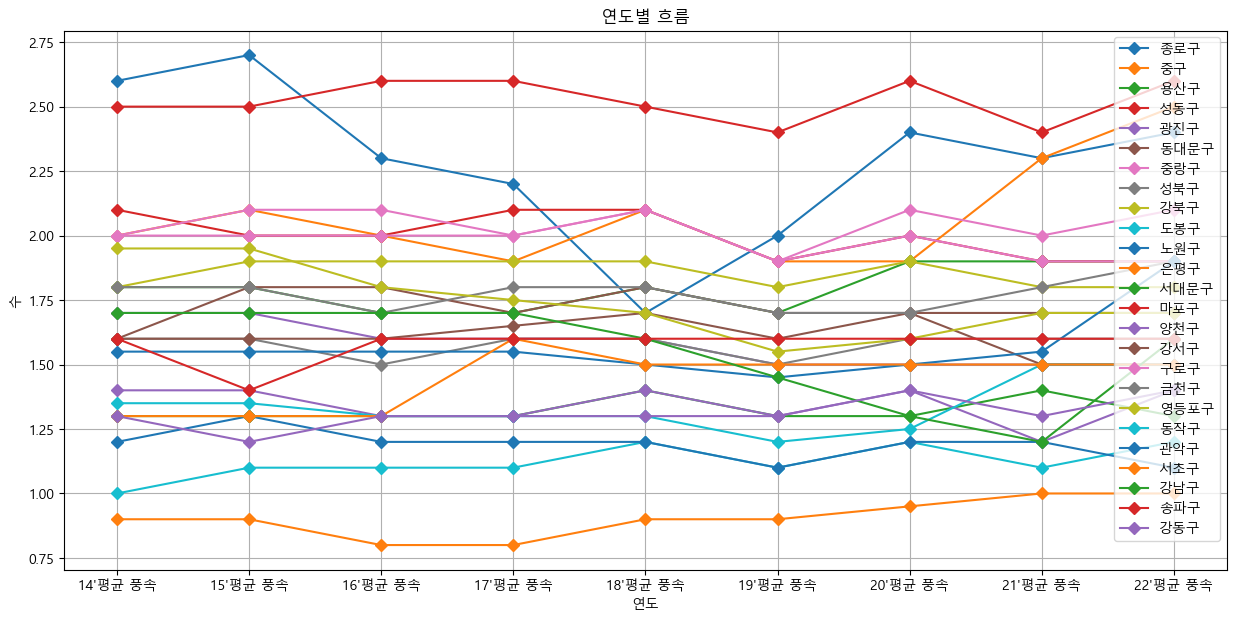

In [40]:
show_plt(5)

- 종로구의 평균 풍속이 다른 구들과 달리 변하고 있지만 주변 값들과 비교했을 때 많이 차이나는 값이 아니라 충분히 나올 수 있는 값이라고 판단
- Novelty Detection라고 말하는데 여기서 쓰는게 맞는지 모르겠음

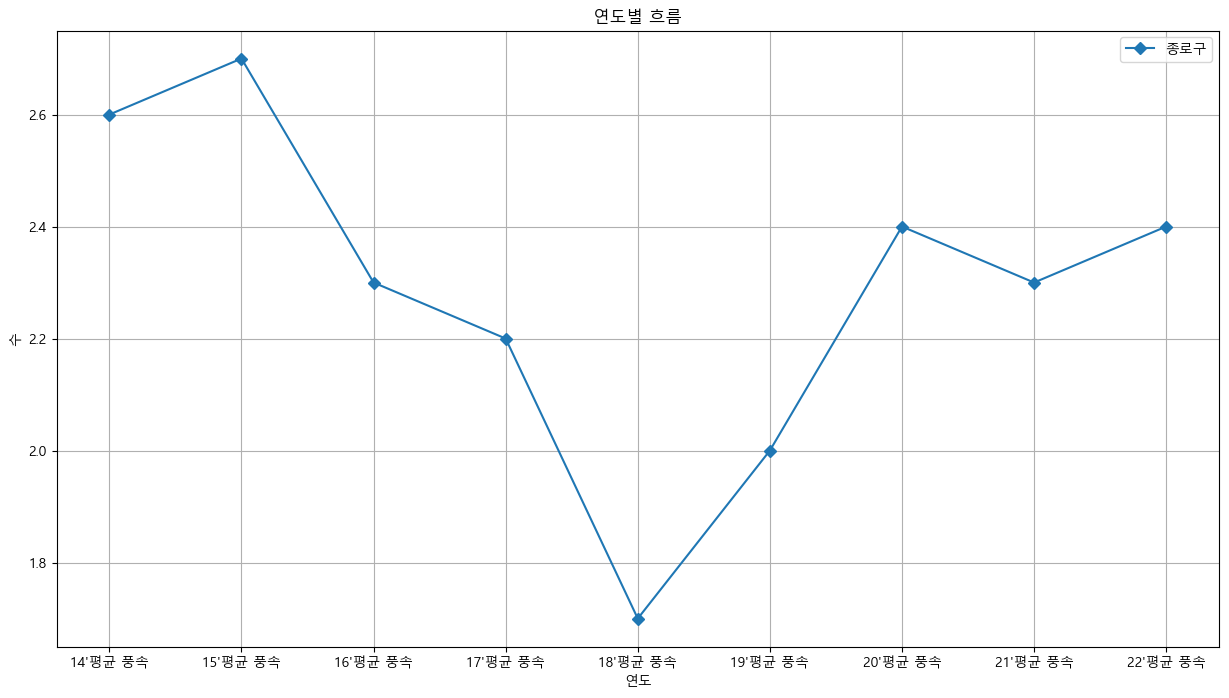

In [41]:
show_plt_part(["종로구"],5)

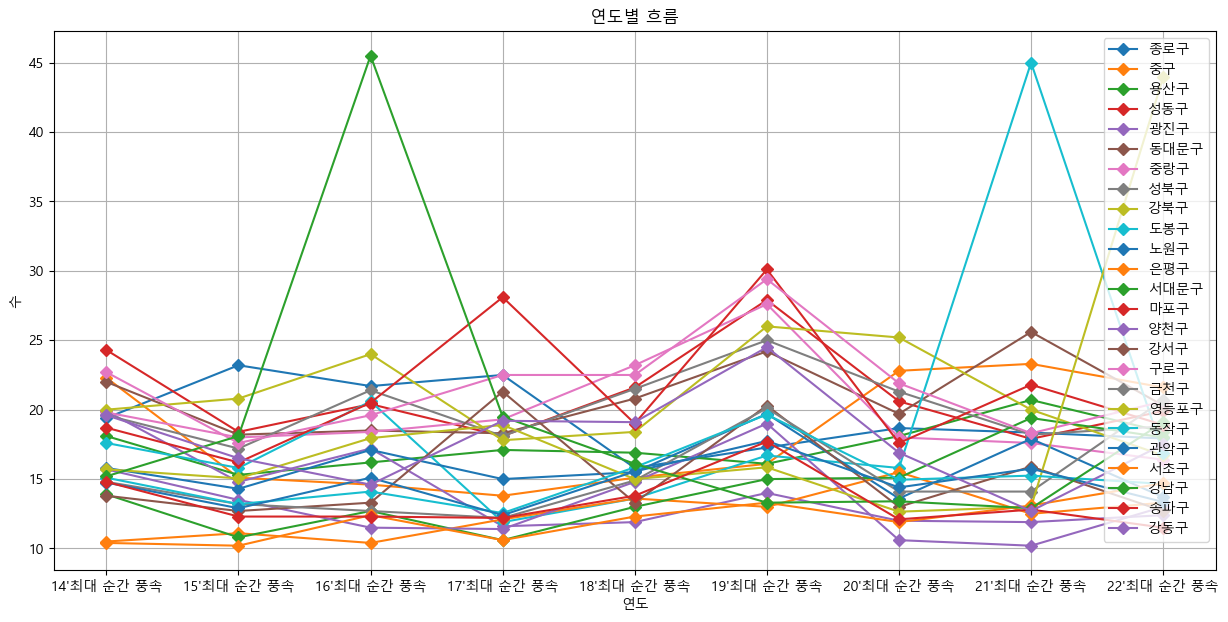

In [42]:
show_plt(6)

- 강남구 도봉구 영등포구 특정 구간에 주변구들과 비교했을 때 2배 정도 차이가 나는 것으로 보임 이상치로 판단
- 태풍의 영향을 생각을 해서 자료를 찾아을때 태풍이 있는 시점도 있지만 하나의 구만 적용된다고는 생각하기 어렵다고 판단함

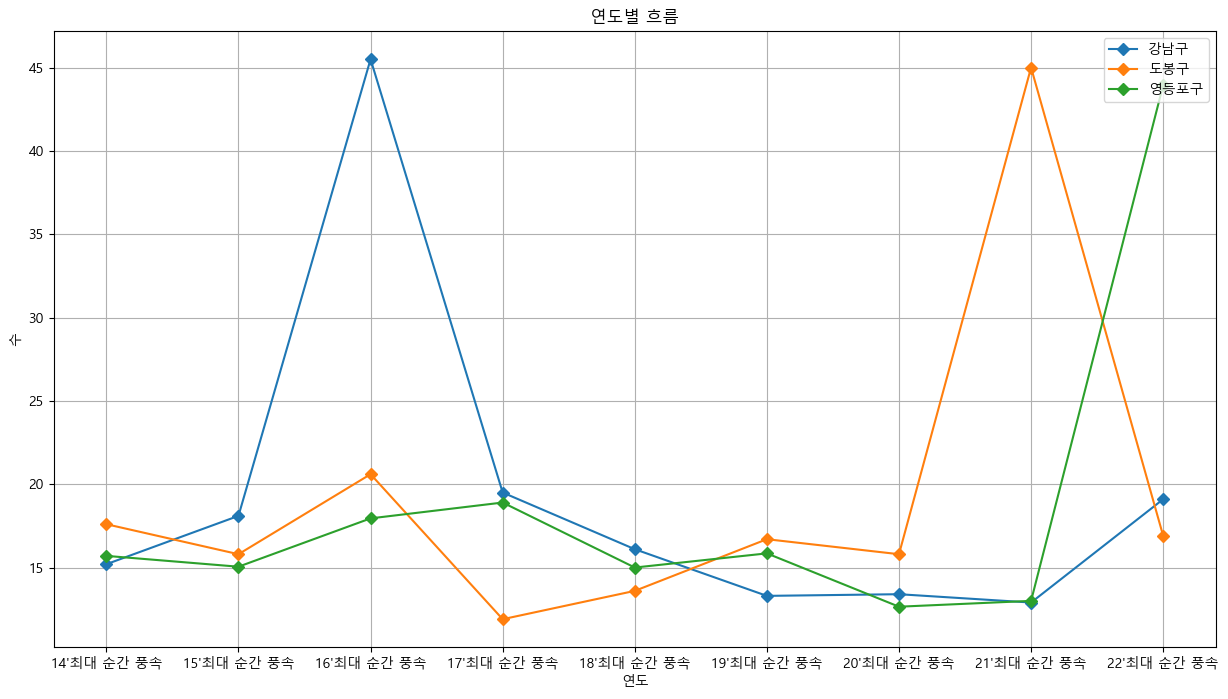

In [43]:
show_plt_part(["강남구","도봉구","영등포구"],6)

- 지가 변동은 크게 이상한 점을 보이지 않음

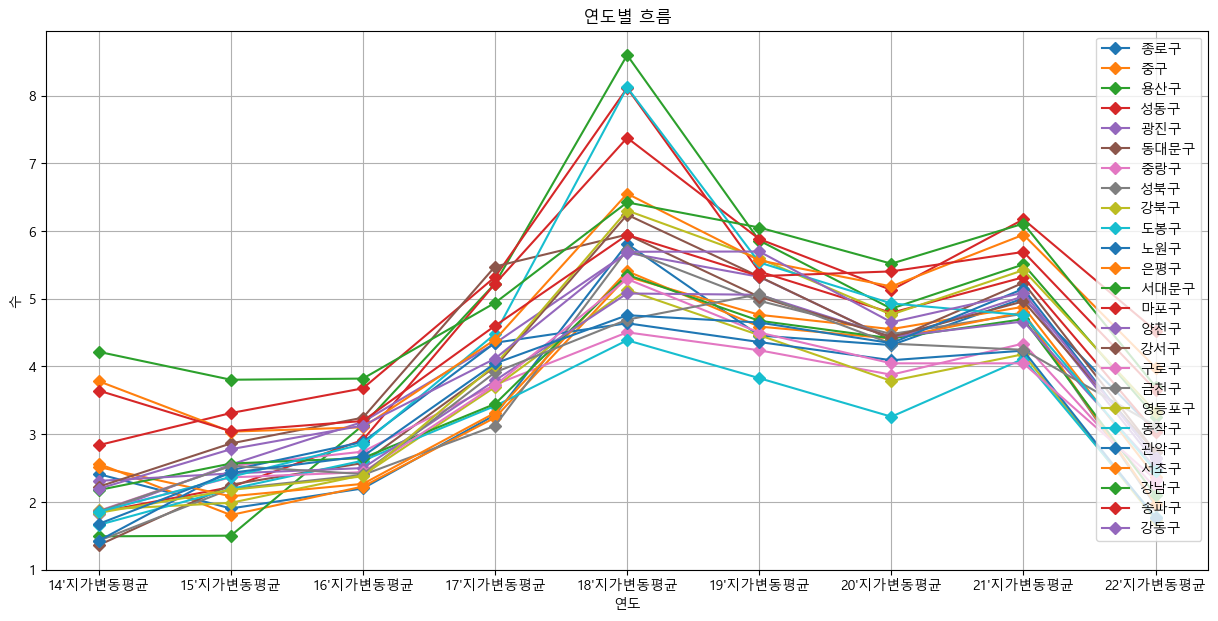

In [44]:
show_plt(8)

- 다음을 이상치라 판단하고 
    - 강수량 합 부분 14년도 서대문구, 중구부분은 최솟값으로 대체
    - 최대순간 풍속 16년도 강남, 21년도 도봉, 22년도 영등포 부분은  최댓값으로 대체

In [45]:
df.loc[["서대문구","중구"],"14'강수량합"] = df.loc[(df.index != "서대문구") & (df.index != "중구"),"14'강수량합"].min()

In [46]:
df.loc[["강남구"],"16'최대 순간 풍속"] =df.loc[df.index != "강남구","16'최대 순간 풍속"].max()
df.loc[["도봉구"],"21'최대 순간 풍속"] =df.loc[df.index != "도봉구","21'최대 순간 풍속"].max()
df.loc[["영등포구"],"22'최대 순간 풍속"] =df.loc[df.index != "영등포구","22'최대 순간 풍속"].max()

In [47]:
# 이상치, 결측치 다 처리한 데이터 프레임
df_fix_list = []
for i in data_list:
    df_t = pd.DataFrame()
    for j in range(14,23):
        df_t = pd.concat([df_t,df.loc[:,f"{j}'{i}"].to_frame()],axis=1)
    df_fix_list.append(df_t)

# 상관관계 확인

- 원래 데이터를 수정해서 상관관계 확인

In [48]:
crime_df_fin = pd.read_csv("./totalData6.csv",encoding="CP949")
crime_df_fin.head()

연도  자치구    발생       검거율  cctv      인구   인구밀도  파출소현황   경찰관  행복지수  ...  최고기온  \
0  14  종로구  5021  0.918144   103  165344   6914     26  1083  6.90  ...  35.8   
1  14   중구  5231  0.609444    77  136227  13677     20   985  6.56  ...  34.0   
2  14  용산구  3799  0.615952    68  249914  11428     13   655  6.72  ...  35.4   
3  14  성동구  3582  0.571748   110  303891  18028     16   613  6.90  ...  34.2   
4  14  광진구  6268  0.563338   176  377375  22117     11   653  6.74  ...  35.4   

   평균최고기온  최저기온  평균최저기온  평균풍속  최대 순간 풍속   강수량합  유흥주점  외국인 인구  평균연령  
0    18.3 -13.2     9.3   2.6      19.4  808.9   360    8351  42.5  
1    17.4 -13.8     8.5   2.0      22.3  702.5   358    8162  42.9  
2    18.5 -11.7    10.1   1.8      18.1  718.5   156   13963  41.8  
3    18.0 -10.5    10.5   2.1      24.3  916.5    77    7805  40.5  
4    18.5 -11.2    10.2   1.7      19.9  852.5   108   14021  39.5  

[5 rows x 24 columns]

In [49]:
correlation_matrix = crime_df_fin.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_22212\3582981650.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = crime_df_fin.corr()


Text(0.5, 1.0, 'Correlation Heatmap')

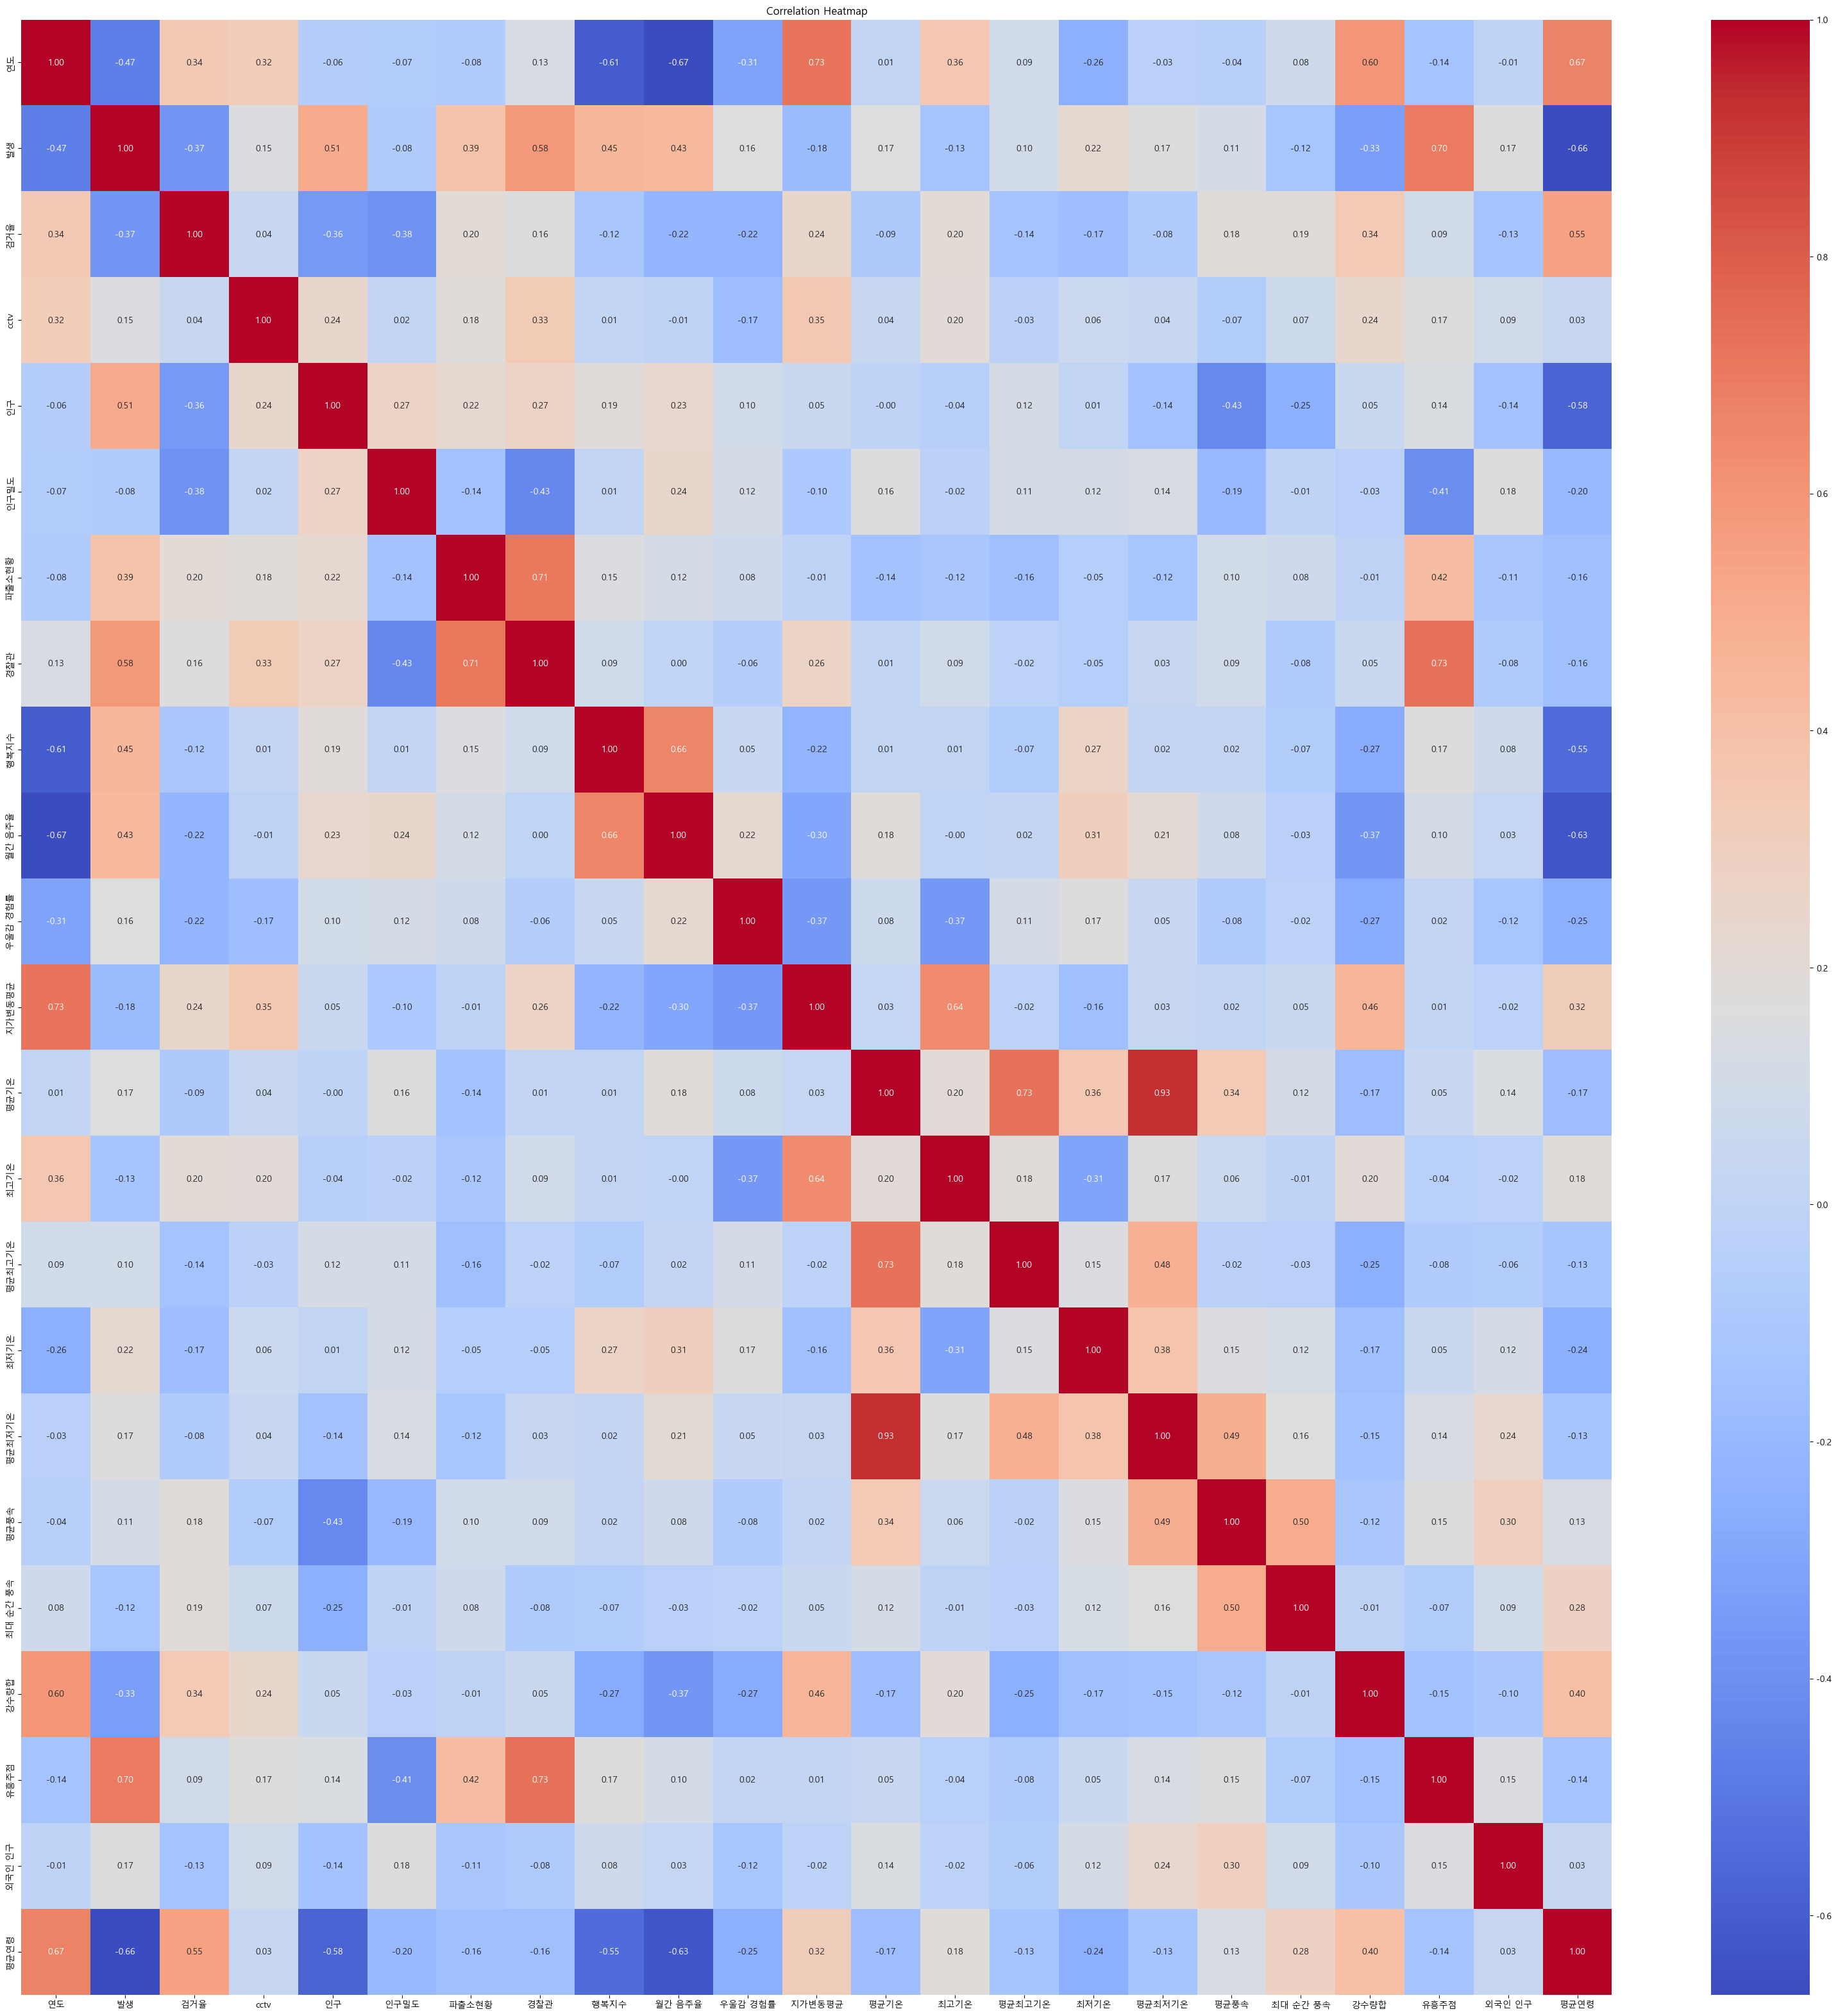

In [50]:
plt.figure(figsize=(40, 40), dpi = 100)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")

In [51]:
correlation_matrix.loc["발생"] 

연도         -0.466936
발생          1.000000
검거율        -0.368764
cctv        0.153300
인구          0.507536
인구밀도       -0.080148
파출소현황       0.385896
경찰관         0.583989
행복지수        0.450440
월간 음주율      0.428799
우울감 경험률     0.164003
지가변동평균     -0.184691
평균기온        0.166209
최고기온       -0.132454
평균최고기온      0.097798
최저기온        0.220784
평균최저기온      0.168699
평균풍속        0.111103
최대 순간 풍속   -0.121856
강수량합       -0.333688
유흥주점        0.699049
외국인 인구      0.169126
평균연령       -0.663444
Name: 발생, dtype: float64

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.model_selection import KFold,cross_validate
from bayes_opt import BayesianOptimization
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error

# 데이터 전처리

In [53]:
y = crime_df_fin["발생"]
x = crime_df_fin.drop(labels="발생",axis=1)
x = x.drop(labels="연도",axis=1)

In [54]:
x_train,x_test, y_train, y_test = train_test_split(x,y,random_state=0, test_size=0.2)

In [55]:
gu_train = x_train["자치구"]
gu_no_train = x_train.drop(labels="자치구",axis=1)

gu_test = x_test["자치구"]
gu_no_test = x_test.drop(labels="자치구",axis=1)

In [56]:
# train셋 원핫 인코당
train_gu_arr=np.array(gu_train)
train_gu_arr=np.reshape(train_gu_arr,(-1,1))
ohe_train=OneHotEncoder()
ohe_gu=ohe_train.fit_transform(train_gu_arr)
ohe_gu_train_df=pd.DataFrame(ohe_gu.toarray(),columns=ohe_train.get_feature_names_out())
ohe_train.get_feature_names_out()

array(['x0_강남구', 'x0_강동구', 'x0_강북구', 'x0_강서구', 'x0_관악구', 'x0_광진구',
       'x0_구로구', 'x0_금천구', 'x0_노원구', 'x0_도봉구', 'x0_동대문구', 'x0_동작구',
       'x0_마포구', 'x0_서대문구', 'x0_서초구', 'x0_성동구', 'x0_성북구', 'x0_송파구',
       'x0_양천구', 'x0_영등포구', 'x0_용산구', 'x0_은평구', 'x0_종로구', 'x0_중구',
       'x0_중랑구'], dtype=object)

In [57]:
ss = StandardScaler()
scaled_train =ss.fit_transform(gu_no_train)
scaled_test = ss.transform(gu_no_test)

In [58]:
# test셋 원핫 인코딩
test_gu_arr=np.array(gu_test)
test_gu_arr=np.reshape(test_gu_arr,(-1,1))
ohe_gu= ohe_train.transform(test_gu_arr)
ohe_gu_test_df=pd.DataFrame(ohe_gu.toarray(),columns=ohe_train.get_feature_names_out())
ohe_train.get_feature_names_out()

array(['x0_강남구', 'x0_강동구', 'x0_강북구', 'x0_강서구', 'x0_관악구', 'x0_광진구',
       'x0_구로구', 'x0_금천구', 'x0_노원구', 'x0_도봉구', 'x0_동대문구', 'x0_동작구',
       'x0_마포구', 'x0_서대문구', 'x0_서초구', 'x0_성동구', 'x0_성북구', 'x0_송파구',
       'x0_양천구', 'x0_영등포구', 'x0_용산구', 'x0_은평구', 'x0_종로구', 'x0_중구',
       'x0_중랑구'], dtype=object)

In [59]:
scaled_train_df = pd.DataFrame(data=scaled_train,columns=x.columns[1:])
scaled_test_df = pd.DataFrame(data=scaled_test, columns=x.columns[1:])

In [60]:
# standart 스케일링 + 원핫 인코딩 합치기
scaled_train_df = pd.concat([scaled_train_df,ohe_gu_train_df],axis=1)
scaled_test_df = pd.concat([scaled_test_df,ohe_gu_test_df],axis=1)

In [61]:
# 데이터프레임 배열로 바꿔주기
scaled_train = scaled_train_df.values
scaled_test = scaled_test_df.values

In [62]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 0)

## 랜덤포레스트 회귀

- RandomForest 랜덤서치

In [65]:
rf_reg = RandomForestRegressor(random_state=0)
params = {"min_impurity_decrease" : uniform(0.0001,0.001),
         "max_depth" : randint(3,10),
         "n_estimators" : randint(100,300),
         "min_samples_split" : randint(2,25),
        "min_samples_leaf" : randint(1,25)}
rf_reg_random = RandomizedSearchCV(rf_reg,params,n_jobs=-1,n_iter=100,scoring='neg_root_mean_squared_error',random_state=0,cv=kf)

In [66]:
rf_reg_random.fit(scaled_train,y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=RandomForestRegressor(random_state=0), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000013CEA4A5E10>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000013CEA...
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000013CEB1AE4D0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000013CEB1BF850>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000013CEA4578D0>},
                   random_state=0, scoring='neg_root_mean_squared_error')

In [67]:
rf_reg_random.best_score_

-498.26076619571995

In [68]:
model_rf_random = rf_reg_random.best_estimator_
print(model_rf_random.score(scaled_test,y_test))
print(model_rf_random.score(scaled_train,y_train))

0.8455162666924396
0.9732946785288803


In [69]:
rf_reg_random_pred = model_rf_random.predict(scaled_test)
rf_reg_random_mse = mean_squared_error(y_test,rf_reg_random_pred)
rf_reg_random_rmse = np.sqrt(rf_reg_random_mse)
print(rf_reg_random_rmse)

570.6165682504098


- RandomForest 베이지안

In [70]:
def rf_bay(n_estimators,max_depth,min_impurity_decrease,min_samples_split,min_samples_leaf):
    param = {
        "n_estimators" : int(n_estimators),
        "max_depth" : int(max_depth),
        "min_impurity_decrease" :min_impurity_decrease,
        "min_samples_split" : int(min_samples_split),
        "min_samples_leaf" : int(min_samples_leaf)
    }
    rf_reg = RandomForestRegressor(**param,random_state=0)
    neg_mse_scores = cross_validate(rf_reg,scaled_train,y_train,scoring="neg_mean_squared_error",
                                   cv=kf,error_score="raise")
    rmse_scores = np.sqrt(-1 * neg_mse_scores["test_score"])
    mean_rmse = np.mean(rmse_scores)    
    return -mean_rmse


In [71]:
params = {
    "n_estimators" : (100,300),
    "max_depth" : (3,10),
    "min_impurity_decrease" :(0.0001,0.001),
    "min_samples_split" : (2,25),
    "min_samples_leaf" : (1,25)
}

In [72]:
model_rf_bayes = BayesianOptimization(f = rf_bay, pbounds = params, random_state = 0)
model_rf_bayes.maximize(init_points=5, n_iter=25)
model_rf_bayes.max

|   iter    |  target   | max_depth | min_im... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
| 1         | -786.9    | 6.842     | 0.0007437 | 15.47     | 14.53     | 184.7     |
| 2         | -897.5    | 7.521     | 0.0004938 | 22.4      | 24.16     | 176.7     |
| 3         | -774.1    | 8.542     | 0.000576  | 14.63     | 23.29     | 114.2     |
| 4         | -870.9    | 3.61      | 0.0001182 | 20.98     | 19.9      | 274.0     |
| 5         | -737.6    | 9.85      | 0.0008192 | 12.08     | 19.95     | 123.7     |
| 6         | -671.7    | 10.0      | 0.000513  | 9.511     | 12.66     | 119.1     |
| 7         | -567.3    | 10.0      | 0.00073   | 5.168     | 4.423     | 124.1     |
| 8         | -622.3    | 3.0       | 0.0001    | 1.0       | 2.0       | 137.6     |
| 9         | -877.2    | 10.0      | 0.001     | 21.53     | 2.0       | 130.5     |
| 10        | -623.1    | 3.0       | 0.0001    | 1.0 

{'target': -486.91516936279993,
 'params': {'max_depth': 10.0,
  'min_impurity_decrease': 0.001,
  'min_samples_leaf': 1.0,
  'min_samples_split': 2.0,
  'n_estimators': 281.93849201660197}}

In [73]:
rf_bay = RandomForestRegressor(random_state=0,max_depth=10,min_impurity_decrease=0.001,
                              min_samples_leaf=1,min_samples_split=2,n_estimators=281)

In [74]:
model_rf_bayes = rf_bay.fit(scaled_train,y_train)

In [75]:
print(model_rf_bayes.score(scaled_train,y_train))
print(model_rf_bayes.score(scaled_test,y_test))

0.9825054421078601
0.85746087654636


In [76]:
rf_reg_bay_pred = model_rf_bayes.predict(scaled_test)
rf_reg_bay_mse = mean_squared_error(y_test,rf_reg_bay_pred)
rf_reg_bay_rmse = np.sqrt(rf_reg_bay_mse)
print(rf_reg_bay_rmse)

548.1129225725149


## XGBOOST

- XGBOOST 랜덤서치

In [77]:
xgb_reg = xgb.XGBRegressor(booster="dart",random_state=0)
params = {"subsample" : uniform(0,1),
         "max_depth" : randint(3,10),
         "n_estimators" : randint(100,300),
           'learning_rate':uniform(0.01, 0.1),
                    "gamma": randint(0,5),}
xgb_reg_random = RandomizedSearchCV(xgb_reg,params,n_jobs=-1,n_iter=100,scoring='neg_root_mean_squared_error',random_state=0,cv=kf)

In [78]:
xgb_reg_random.fit(scaled_train,y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=XGBRegressor(base_score=None, booster='dart',
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=No...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000013CEB266150>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000013CEA555850>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000013CEB266990>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000013CEA4DF890>},
                   random_state=0, scoring='neg_root_mean_squared_error')

In [79]:
xgb_reg_random.best_params_

{'gamma': 0,
 'learning_rate': 0.06761573344178369,
 'max_depth': 3,
 'n_estimators': 254,
 'subsample': 0.5722519057908734}

In [80]:
xgb_reg_random.best_score_

-358.2974392070099

In [81]:
model_xgb_random = xgb_reg_random.best_estimator_
print(model_xgb_random.score(scaled_test,y_test))
print(model_xgb_random.score(scaled_train,y_train))

0.8916655362838571
0.9990733640372746


In [82]:
xgb_reg_random_pred = model_xgb_random.predict(scaled_test)
xgb_reg_random_mse = mean_squared_error(y_test,xgb_reg_random_pred)
xgb_reg_random_rmse = np.sqrt(xgb_reg_random_mse)
print(xgb_reg_random_rmse)

477.8441993003635


- XGBOOST 베이지안 최적화

In [83]:
def xgb_bay(learning_rate,subsample,max_depth,n_estimators,gamma):
    param ={
        "learning_rate" : learning_rate,
        "subsample" : subsample,
        "max_depth" : int(max_depth),
        "n_estimators" : int(n_estimators),
        "gamma" : int(gamma)
    }
    xgb_reg = xgb.XGBRegressor(**param,random_state=0,booster="dart")
    neg_mse_scores = cross_validate(xgb_reg, scaled_train, y_train,
                                     scoring = 'neg_mean_squared_error',
                                     cv = kf,error_score="raise")
    rmse_scores = np.sqrt(-1 * neg_mse_scores["test_score"])
    mean_rmse = np.mean(rmse_scores)    
    return -mean_rmse

In [84]:
params = {
    "subsample" : (0,1),
         "max_depth" : (3,10),
         "n_estimators" : (100,300),
           'learning_rate':(0.01, 0.1),
                    "gamma": (0,5),
         }

In [85]:
model_xgb_bayes = BayesianOptimization(f = xgb_bay, pbounds = params, random_state = 0)
model_xgb_bayes.maximize(init_points=5, n_iter=25)
model_xgb_bayes.max

|   iter    |  target   |   gamma   | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------
| 1         | -367.3    | 2.744     | 0.07437   | 7.219     | 209.0     | 0.4237    |
| 2         | -382.1    | 3.229     | 0.04938   | 9.242     | 292.7     | 0.3834    |
| 3         | -614.5    | 3.959     | 0.0576    | 6.976     | 285.1     | 0.07104   |
| 4         | -514.1    | 0.4356    | 0.01182   | 8.828     | 255.6     | 0.87      |
| 5         | -497.0    | 4.893     | 0.08192   | 6.23      | 256.1     | 0.1183    |
| 6         | -370.7    | 3.109     | 0.07652   | 7.236     | 210.9     | 0.4068    |
| 7         | -406.7    | 2.626     | 0.04252   | 10.0      | 299.0     | 0.6418    |
| 8         | -451.4    | 5.0       | 0.1       | 3.0       | 202.9     | 1.0       |
| 9         | -1.284e+0 | 0.0       | 0.1       | 3.0       | 211.2     | 0.0       |
| 10        | -419.5    | 4.818     | 0.062     | 9.62

{'target': -367.2784921933192,
 'params': {'gamma': 2.7440675196366238,
  'learning_rate': 0.07436704297351776,
  'max_depth': 7.2193436325015075,
  'n_estimators': 208.9766365993794,
  'subsample': 0.4236547993389047}}

In [86]:
xgb_bayesin = xgb.XGBRegressor(booster="dart",random_state=0,learning_rate =0.05003407514310391,
                              max_depth = 3, n_estimators=253,subsample=0.7629999608672193,
                               gamma=2)

In [87]:
model_xgb_bayesin = xgb_bayesin.fit(scaled_train,y_train)

In [88]:
print(model_xgb_bayesin.score(scaled_train,y_train))
print(model_xgb_bayesin.score(scaled_test,y_test))

0.9984779288511841
0.8830005549549926


In [89]:
xgb_bayesin_pred = model_xgb_bayesin.predict(scaled_test)
xgb_bayesin_mse = mean_squared_error(y_test,xgb_bayesin_pred)
xgb_bayesin_rmse = np.sqrt(xgb_bayesin_mse)
print(xgb_bayesin_rmse)

496.5864902979078


In [97]:
def plot_feature_importances(model):
    plt.figure(figsize=(6,8))
    n_features = scaled_train.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align="center")
    plt.yticks(np.arange(n_features),scaled_train_df.columns)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1,n_features)
    plt.show()

# 모델별 특성 중요도 확인

- 랜덤포레스트 랜덤서치

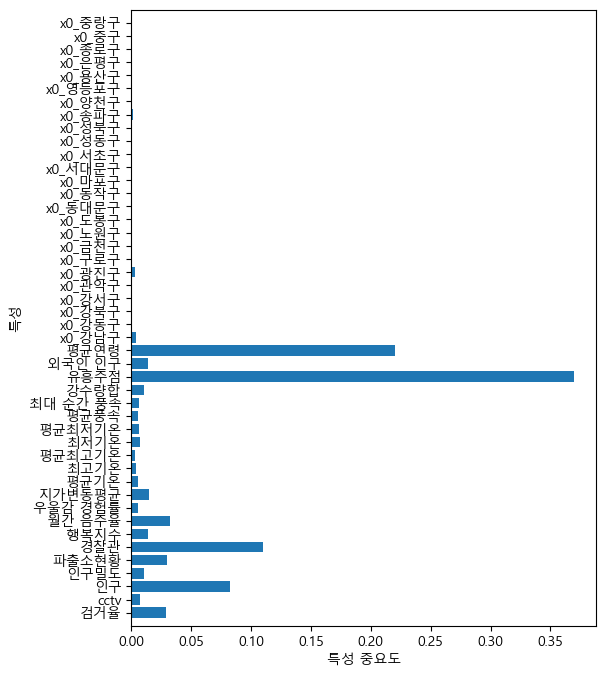

In [98]:
plot_feature_importances(model_rf_random)

- 랜덤포레스트 베이지안

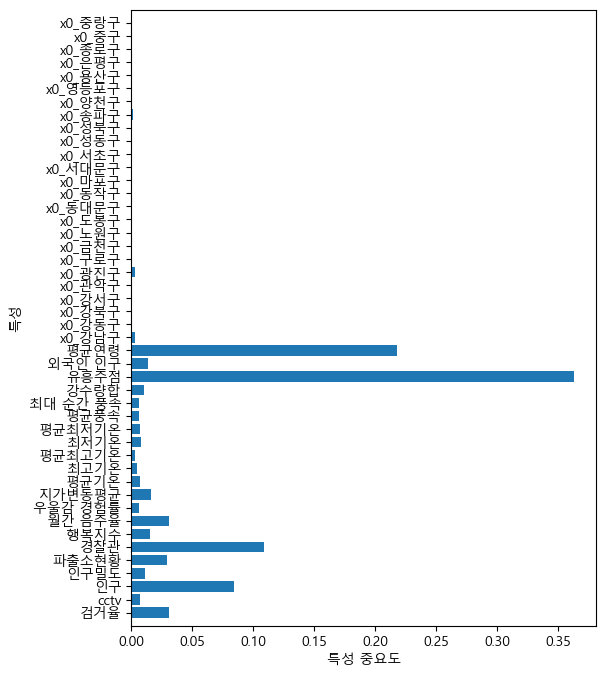

In [99]:
plot_feature_importances(model_rf_bayes)

- XGB 랜덤서치

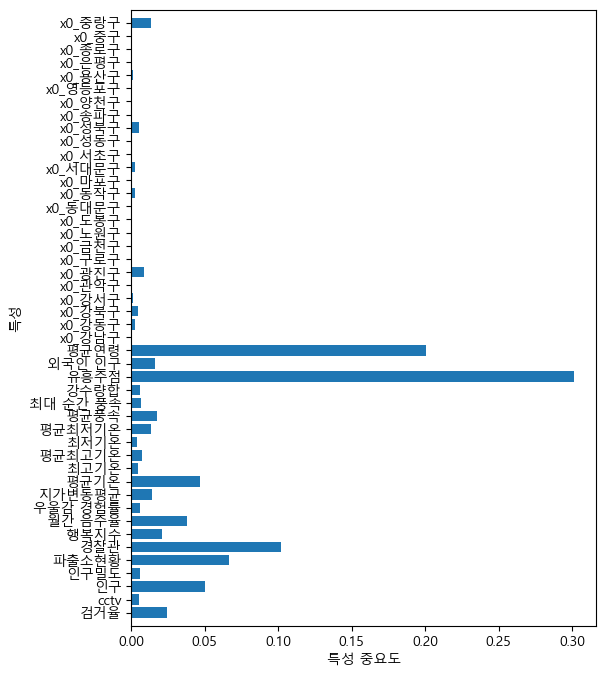

In [100]:
plot_feature_importances(model_xgb_random)

- XGB 베이지안

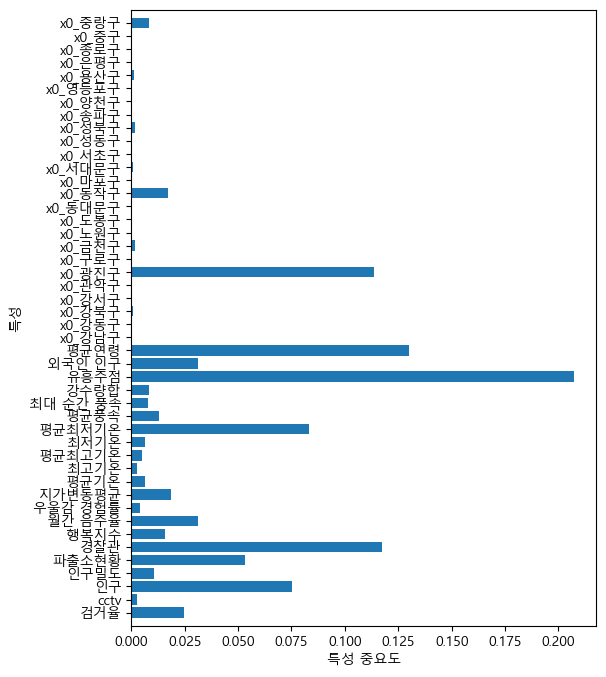

In [101]:
plot_feature_importances(model_xgb_bayesin)

- 평균 연령과 유흥주점의 수가 전체적으로 큰 영향을 끼침

In [102]:
total_rmse = pd.DataFrame({"model": ["rf_random","rf_bayesin","xgb_random","xgb_bayesin"],
                           "rmse" : [rf_reg_random_rmse,rf_reg_bay_rmse,xgb_reg_random_rmse,xgb_bayesin_rmse]})

In [103]:
total_rmse

model        rmse
0    rf_random  570.616568
1   rf_bayesin  548.112923
2   xgb_random  477.844199
3  xgb_bayesin  496.586490

### XGBOOST 랜덤서치가 가장 성능이 좋음

- XGBOOST 랜덤서치 파라미터를 조절하여 성능을 개선

In [ ]:
xgb_reg = xgb.XGBRegressor(booster="dart",random_state=0)
params = {"subsample" : uniform(0,1),
         "max_depth" : randint(3,10),
         "n_estimators" : randint(100,300),
           'learning_rate':uniform(0.01, 0.1),
                    "gamma": randint(0,5),}
xgb_reg_random = RandomizedSearchCV(xgb_reg,params,n_jobs=-1,n_iter=100,scoring='neg_root_mean_squared_error',random_state=0,cv=kf)

In [ ]:
xgb_reg_random.fit(scaled_train,y_train)

In [ ]:
xgb_reg_random.best_params_

In [ ]:
xgb_reg_random.best_score_

In [ ]:
model_xgb_random = xgb_reg_random.best_estimator_
print(model_xgb_random.score(scaled_test,y_test))
print(model_xgb_random.score(scaled_train,y_train))

In [ ]:
xgb_reg_random_pred = model_xgb_random.predict(scaled_test)
xgb_reg_random_mse = mean_squared_error(y_test,xgb_reg_random_pred)
xgb_reg_random_rmse = np.sqrt(xgb_reg_random_mse)
print(xgb_reg_random_rmse)

In [95]:
pred_x = crime_df_fin.tail(25).drop(labels=["연도","자치구","발생"] ,axis=1)
pred_y= crime_df_fin.tail(25)["발생"]

In [96]:
pred_x

검거율  cctv      인구   인구밀도  파출소현황   경찰관  행복지수  월간 음주율  우울감 경험률  \
200  1.046526   207  152211   6365     26  1080  6.90    53.4      8.7   
201  0.690003   137  130785  13131     19  1019  6.44    53.8      7.7   
202  0.705426   464  233284  10668     13   806  6.50    52.6      3.6   
203  0.727894   232  288234  17136     16   649  6.99    55.4      6.9   
204  0.690246   273  351252  20586     13   751  6.53    58.9      8.4   
205  0.685828   317  353601  24873     21   837  6.76    54.5      3.2   
206  0.742151   294  390140  21092     18   781  6.92    57.6      6.2   
207  0.773008   338  441984  17983     26   940  6.95    56.3      7.4   
208  0.827331   797  297702  12614     15   691  6.52    52.2      4.5   
209  0.732835   591  313989  15205     10   574  6.62    50.2      7.5   
210  0.677875   144  508014  14335     17   824  6.59    51.9      6.3   
211  0.762260   522  470602  15838     22   945  7.01    52.3      3.7   
212  0.676074   174  319554  18129     12   679  6.91    52.5     10.2   
213  0.687012   117  375585  15745     16   924  6.91    57.8     10.3   
214  0.672136   292  444010  25509     16   764  6.46    56.8      8.0   
215  0.770105   596  574638  13862     14   963  6.37    51.8      7.2   
216  0.708323   341  418418  20794     18   772  6.48    59.7      7.2   
217  0.732247   304  242818  18649     13   600  6.37    55.6     11.9   
218  0.661133   450  398085  16215     16  1008  6.38    57.4      7.6   
219  0.636563   373  390432  23870     18   687  7.11    52.8      6.0   
220  0.699119   135  501226  16951     19   945  6.73    53.2      8.1   
221  0.694775   876  408451   8696     21  1142  6.96    56.8      7.1   
222  0.722614   468  534103  13522     23  1608  6.35    60.2      7.3   
223  0.659764   431  664514  19616     22  1084  7.06    59.3      9.6   
224  0.712476   429  464037  18871     17   787  6.86    54.2      7.5   

     지가변동평균  ...  최고기온     평균최고기온  최저기온     평균최저기온  평균풍속  최대 순간 풍속     강수량합  \
200   3.045  ...  36.1  18.000000 -13.7   9.200000   2.4    17.925  1775.30   
201   2.366  ...  35.2  16.900000 -15.8   8.200000   2.5    21.600  1452.50   
202   3.255  ...  37.0  18.400000 -12.4   9.800000   1.9    18.400  1699.00   
203   4.528  ...  36.1  18.800000 -12.9  11.000000   1.9    19.900  1727.50   
204   2.581  ...  36.3  18.400000 -12.9   9.300000   1.5    12.400  1918.00   
205   2.736  ...  36.3  18.500000 -13.0   9.700000   1.7    20.300  1848.50   
206   2.203  ...  36.6  18.300000 -13.1   9.900000   1.9    16.400  1835.00   
207   1.946  ...  33.8  16.900000 -14.3   8.600000   1.6    18.800  1912.50   
208   1.734  ...  37.4  18.100000 -14.5   9.000000   1.8    16.700  1937.00   
209   1.779  ...  34.2  18.366667 -15.2   7.733333   1.2    16.900  2074.00   
210   1.755  ...  36.4  18.100000 -17.5   5.800000   1.1    13.700  1687.00   
211   1.971  ...  35.1  17.500000 -16.2   5.700000   1.0    13.300  1723.00   
212   2.099  ...  35.3  17.700000 -14.3   8.200000   1.3    18.000  1514.50   
213   3.026  ...  36.6  18.600000 -13.8   9.500000   2.6    18.900  1588.00   
214   2.503  ...  37.2  18.600000 -12.5  10.200000   1.4    13.000  1625.00   
215   2.732  ...  37.6  18.600000 -13.1   8.500000   1.5    12.700  1572.00   
216   2.328  ...  35.4  18.300000 -12.7   9.100000   2.1    20.600  1727.00   
217   3.125  ...  37.1  18.300000 -13.0  10.100000   1.9    20.700  1875.00   
218   3.328  ...  36.6  18.250000 -12.7  10.400000   1.7    21.600  1639.40   
219   2.457  ...  36.4  18.250000 -14.7   8.300000   1.5    14.650  1863.50   
220   2.643  ...  34.4  17.100000 -14.5   7.200000   1.9    13.350  1820.25   
221   3.982  ...  36.1  18.500000 -12.7   8.900000   1.5    14.700  1968.50   
222   3.701  ...  36.8  18.800000 -12.8   9.200000   1.6    19.100  1709.50   
223   3.655  ...  36.7  18.500000 -13.0  10.100000   1.6    11.500  1949.50   
224   2.648  ...  37.6  18.400000 -13.3   8.900000   1.4    17.500  1985.00   

     유흥주점  외국인 인구  평균연령  
200 

In [97]:
pred_gu_arr = np.array(crime_df_fin.tail(25)["자치구"])
pred_gu_arr = np.reshape(pred_gu_arr,(-1,1))
pred_gu = ohe_train.transform(pred_gu_arr)
ohe_pred_df = pd.DataFrame(pred_gu.toarray(),columns=ohe_train.get_feature_names_out())

In [98]:
pred = ss.transform(pred_x)

In [99]:
pred_df = pd.DataFrame(data=pred,columns=pred_x.columns)
pred_df = pd.concat([pred_df,ohe_pred_df],axis=1)
pred_df.head()

검거율      cctv        인구      인구밀도     파출소현황       경찰관      행복지수  \
0  3.972218 -0.665718 -2.004936 -2.319776  1.914658  1.193229  0.393475   
1 -0.186242 -0.947973 -2.172713 -0.890887  0.229973  0.890286 -1.107894   
2 -0.006348  0.370560 -1.370090 -1.411040 -1.214043 -0.167529 -0.912063   
3  0.255716 -0.564913 -0.939801 -0.045085 -0.492035 -0.947233  0.687221   
4 -0.183411 -0.399592 -0.446335  0.683509 -1.214043 -0.440674 -0.814148   

     월간 음주율   우울감 경험률    지가변동평균  ...  x0_성동구  x0_성북구  x0_송파구  x0_양천구  x0_영등포구  \
0 -0.871019  0.865053 -0.519247  ...     0.0     0.0     0.0     0.0      0.0   
1 -0.790679  0.384616 -0.987030  ...     0.0     0.0     0.0     0.0      0.0   
2 -1.031699 -1.585175 -0.374571  ...     0.0     0.0     0.0     0.0      0.0   
3 -0.469319  0.000267  0.502437  ...     1.0     0.0     0.0     0.0      0.0   
4  0.233655  0.720922 -0.838910  ...     0.0     0.0     0.0     0.0      0.0   

   x0_용산구  x0_은평구  x0_종로구  x0_중구  x0_중랑구  
0     0.0     0.0     1.0    0.0     0.0  
1     0.0     0.0     0.0    1.0     0.0  
2     1.0     0.0     0.0    0.0     0.0  
3     0.0     0.0     0.0    0.0     0.0  
4     0.0     0.0     0.0    0.0     0.0  

[5 rows x 46 columns]

In [100]:
pred_22 = model_xgb_random.predict(pred_df.values)

In [101]:
crime_22 = crime_df_fin.tail(25)[["자치구","발생"]]
crime_22["예측 발생"] = pred_22

In [102]:
crime_22

자치구    발생        예측 발생
200   종로구  3138  3168.679688
201    중구  3071  3167.379395
202   용산구  2967  3043.948730
203   성동구  2194  2188.172852
204   광진구  3619  3570.146484
205  동대문구  3253  3338.956055
206   중랑구  3599  3633.820312
207   성북구  2749  2703.364746
208   강북구  2832  2861.936035
209   도봉구  2141  2093.029785
210   노원구  3896  3796.350586
211   은평구  3487  3481.214844
212  서대문구  2374  2379.423340
213   마포구  4096  4084.604004
214   양천구  3169  3185.681152
215   강서구  4663  4624.233398
216   구로구  3857  3848.510742
217   금천구  2577  2559.521973
218  영등포구  4819  4723.703125
219   동작구  2735  2837.488770
220   관악구  4879  4857.572754
221   서초구  4459  4479.175781
222   강남구  6947  6907.073242
223   송파구  5167  5197.003418
224   강동구  3711  3787.029785

In [104]:
from tensorflow import keras

In [105]:
scaled_train.shape,scaled_test.shape

((160, 46), (40, 46))

In [107]:
scaled_deep_train = np.reshape(scaled_train,(-1,46,1))
scaled_deep_test = np.reshape(scaled_test,(-1,46,1))

In [108]:
scaled_deep_train.shape,scaled_deep_test.shape

((160, 46, 1), (40, 46, 1))

In [109]:
model= keras.Sequential()


# model.add(keras.layers.Conv1D(512,kernel_size=2, activation="relu",padding="same",input_shape = (46,1)))
# model.add(keras.layers.MaxPool1D(2,padding="same"))
# model.add(keras.layers.Dropout(0.3))
# model.add(keras.layers.Conv1D(256,kernel_size=2, activation="relu",padding="same"))
# model.add(keras.layers.MaxPool1D(2,padding="same"))
# model.add(keras.layers.Dropout(0.3))
# model.add(keras.layers.Conv1D(128,kernel_size=2, activation="relu",padding="same"))
# model.add(keras.layers.MaxPool1D(2,padding="same"))
# model.add(keras.layers.Dropout(0.3))
# model.add(keras.layers.Conv1D(64,kernel_size=2, activation="relu",padding="same",input_shape = (46,1)))
# model.add(keras.layers.MaxPool1D(2,padding="same"))
# model.add(keras.layers.Dropout(0.2))
# model.add(keras.layers.Conv1D(32,kernel_size=2, activation="relu",padding="same",input_shape = (46,1)))
# model.add(keras.layers.MaxPool1D(2,padding="same"))
# # model.add(keras.layers.Dropout(0.2))
# model.add(keras.layers.Conv1D(16,kernel_size=2, activation="relu",padding="same"))
# model.add(keras.layers.MaxPool1D(2,padding="same"))
# #model.add(keras.layers.Dropout(0.2))
# model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(500,activation="relu",input_shape=(46,)))
# model.add(keras.layers.Dense(500,activation="relu"))
# model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(400,activation="relu"))
# model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(300,activation="relu"))
# model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(200,activation="relu"))
# model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(100,activation="relu"))
# model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(1))

In [110]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("./best-dense-model.h5",save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=16,restore_best_weights=True)

In [111]:
adam = keras.optimizers.Adam(learning_rate=1e-5)

In [112]:
model.compile(optimizer = adam,loss = "mean_squared_error",metrics=["mse"])

In [113]:
history = model.fit(scaled_deep_train,y_train, epochs=4000,batch_size=16
                    ,validation_split=0.3,callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/4000
7/7 [==============================] - 2s 48ms/step - loss: 19959276.0000 - mse: 19959276.0000 - val_loss: 20574578.0000 - val_mse: 20574578.0000
Epoch 2/4000
7/7 [==============================] - 0s 18ms/step - loss: 19959146.0000 - mse: 19959146.0000 - val_loss: 20574454.0000 - val_mse: 20574454.0000


C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 3/4000
7/7 [==============================] - 0s 16ms/step - loss: 19959020.0000 - mse: 19959020.0000 - val_loss: 20574326.0000 - val_mse: 20574326.0000
Epoch 4/4000
7/7 [==============================] - 0s 17ms/step - loss: 19958892.0000 - mse: 19958892.0000 - val_loss: 20574196.0000 - val_mse: 20574196.0000
Epoch 5/4000
7/7 [==============================] - 0s 16ms/step - loss: 19958762.0000 - mse: 19958762.0000 - val_loss: 20574064.0000 - val_mse: 20574064.0000
Epoch 6/4000
7/7 [==============================] - 0s 16ms/step - loss: 19958628.0000 - mse: 19958628.0000 - val_loss: 20573926.0000 - val_mse: 20573926.0000
Epoch 7/4000
7/7 [==============================] - 0s 16ms/step - loss: 19958490.0000 - mse: 19958490.0000 - val_loss: 20573784.0000 - val_mse: 20573784.0000
Epoch 8/4000
7/7 [==============================] - 0s 17ms/step - loss: 19958346.0000 - mse: 19958346.0000 - val_loss: 20573634.0000 - val_mse: 20573634.0000
Epoch 9/4000
7/7 [============================

7/7 [==============================] - 0s 17ms/step - loss: 19859518.0000 - mse: 19859518.0000 - val_loss: 20468330.0000 - val_mse: 20468330.0000
Epoch 55/4000
7/7 [==============================] - 0s 17ms/step - loss: 19849522.0000 - mse: 19849522.0000 - val_loss: 20457870.0000 - val_mse: 20457870.0000
Epoch 56/4000
7/7 [==============================] - 0s 17ms/step - loss: 19838832.0000 - mse: 19838832.0000 - val_loss: 20446364.0000 - val_mse: 20446364.0000
Epoch 57/4000
7/7 [==============================] - 0s 17ms/step - loss: 19826964.0000 - mse: 19826964.0000 - val_loss: 20433848.0000 - val_mse: 20433848.0000
Epoch 58/4000
7/7 [==============================] - 0s 17ms/step - loss: 19813934.0000 - mse: 19813934.0000 - val_loss: 20420240.0000 - val_mse: 20420240.0000
Epoch 59/4000
7/7 [==============================] - 0s 18ms/step - loss: 19800122.0000 - mse: 19800122.0000 - val_loss: 20405182.0000 - val_mse: 20405182.0000
Epoch 60/4000
7/7 [==============================] - 0

7/7 [==============================] - 0s 16ms/step - loss: 14698885.0000 - mse: 14698885.0000 - val_loss: 15099593.0000 - val_mse: 15099593.0000
Epoch 106/4000
7/7 [==============================] - 0s 16ms/step - loss: 14401945.0000 - mse: 14401945.0000 - val_loss: 14792701.0000 - val_mse: 14792701.0000
Epoch 107/4000
7/7 [==============================] - 0s 17ms/step - loss: 14097897.0000 - mse: 14097897.0000 - val_loss: 14473335.0000 - val_mse: 14473335.0000
Epoch 108/4000
7/7 [==============================] - 0s 16ms/step - loss: 13777698.0000 - mse: 13777698.0000 - val_loss: 14145407.0000 - val_mse: 14145407.0000
Epoch 109/4000
7/7 [==============================] - 0s 16ms/step - loss: 13446706.0000 - mse: 13446706.0000 - val_loss: 13809448.0000 - val_mse: 13809448.0000
Epoch 110/4000
7/7 [==============================] - 0s 17ms/step - loss: 13112733.0000 - mse: 13112733.0000 - val_loss: 13461464.0000 - val_mse: 13461464.0000
Epoch 111/4000
7/7 [=============================

Epoch 157/4000
7/7 [==============================] - 0s 16ms/step - loss: 1733499.3750 - mse: 1733499.3750 - val_loss: 1839252.6250 - val_mse: 1839252.6250
Epoch 158/4000
7/7 [==============================] - 0s 17ms/step - loss: 1722711.7500 - mse: 1722711.7500 - val_loss: 1827870.0000 - val_mse: 1827870.0000
Epoch 159/4000
7/7 [==============================] - 0s 18ms/step - loss: 1715834.2500 - mse: 1715834.2500 - val_loss: 1817571.8750 - val_mse: 1817571.8750
Epoch 160/4000
7/7 [==============================] - 0s 16ms/step - loss: 1710553.6250 - mse: 1710553.6250 - val_loss: 1808288.0000 - val_mse: 1808288.0000
Epoch 161/4000
7/7 [==============================] - 0s 16ms/step - loss: 1705320.7500 - mse: 1705320.7500 - val_loss: 1800683.3750 - val_mse: 1800683.3750
Epoch 162/4000
7/7 [==============================] - 0s 17ms/step - loss: 1699661.1250 - mse: 1699661.1250 - val_loss: 1795810.3750 - val_mse: 1795810.3750
Epoch 163/4000
7/7 [==============================] - 0s 2

7/7 [==============================] - 0s 16ms/step - loss: 1626238.1250 - mse: 1626238.1250 - val_loss: 1714830.6250 - val_mse: 1714830.6250
Epoch 210/4000
7/7 [==============================] - 0s 16ms/step - loss: 1624975.1250 - mse: 1624975.1250 - val_loss: 1712876.6250 - val_mse: 1712876.6250
Epoch 211/4000
7/7 [==============================] - 0s 15ms/step - loss: 1622990.8750 - mse: 1622990.8750 - val_loss: 1712232.6250 - val_mse: 1712232.6250
Epoch 212/4000
7/7 [==============================] - 0s 16ms/step - loss: 1622091.7500 - mse: 1622091.7500 - val_loss: 1710373.5000 - val_mse: 1710373.5000
Epoch 213/4000
7/7 [==============================] - 0s 16ms/step - loss: 1620761.7500 - mse: 1620761.7500 - val_loss: 1710313.3750 - val_mse: 1710313.3750
Epoch 214/4000
7/7 [==============================] - 0s 16ms/step - loss: 1619288.2500 - mse: 1619288.2500 - val_loss: 1709511.3750 - val_mse: 1709511.3750
Epoch 215/4000
7/7 [==============================] - 0s 16ms/step - loss

7/7 [==============================] - 0s 20ms/step - loss: 1553571.3750 - mse: 1553571.3750 - val_loss: 1651984.0000 - val_mse: 1651984.0000
Epoch 262/4000
7/7 [==============================] - 0s 19ms/step - loss: 1551618.1250 - mse: 1551618.1250 - val_loss: 1650447.0000 - val_mse: 1650447.0000
Epoch 263/4000
7/7 [==============================] - 0s 19ms/step - loss: 1550111.8750 - mse: 1550111.8750 - val_loss: 1649238.3750 - val_mse: 1649238.3750
Epoch 264/4000
7/7 [==============================] - 0s 21ms/step - loss: 1548702.0000 - mse: 1548702.0000 - val_loss: 1648222.0000 - val_mse: 1648222.0000
Epoch 265/4000
7/7 [==============================] - 0s 16ms/step - loss: 1547338.3750 - mse: 1547338.3750 - val_loss: 1646723.5000 - val_mse: 1646723.5000
Epoch 266/4000
7/7 [==============================] - 0s 16ms/step - loss: 1545831.6250 - mse: 1545831.6250 - val_loss: 1645536.3750 - val_mse: 1645536.3750
Epoch 267/4000
7/7 [==============================] - 0s 16ms/step - loss

7/7 [==============================] - 0s 16ms/step - loss: 1481352.0000 - mse: 1481352.0000 - val_loss: 1589548.0000 - val_mse: 1589548.0000
Epoch 314/4000
7/7 [==============================] - 0s 16ms/step - loss: 1479483.8750 - mse: 1479483.8750 - val_loss: 1587994.0000 - val_mse: 1587994.0000
Epoch 315/4000
7/7 [==============================] - 0s 16ms/step - loss: 1479984.6250 - mse: 1479984.6250 - val_loss: 1587589.6250 - val_mse: 1587589.6250
Epoch 316/4000
7/7 [==============================] - 0s 16ms/step - loss: 1476958.3750 - mse: 1476958.3750 - val_loss: 1585625.5000 - val_mse: 1585625.5000
Epoch 317/4000
7/7 [==============================] - 0s 16ms/step - loss: 1475727.2500 - mse: 1475727.2500 - val_loss: 1584597.3750 - val_mse: 1584597.3750
Epoch 318/4000
7/7 [==============================] - 0s 16ms/step - loss: 1474507.1250 - mse: 1474507.1250 - val_loss: 1582841.6250 - val_mse: 1582841.6250
Epoch 319/4000
7/7 [==============================] - 0s 16ms/step - loss

7/7 [==============================] - 0s 16ms/step - loss: 1411474.1250 - mse: 1411474.1250 - val_loss: 1529496.6250 - val_mse: 1529496.6250
Epoch 366/4000
7/7 [==============================] - 0s 15ms/step - loss: 1409333.0000 - mse: 1409333.0000 - val_loss: 1528512.5000 - val_mse: 1528512.5000
Epoch 367/4000
7/7 [==============================] - 0s 16ms/step - loss: 1408050.7500 - mse: 1408050.7500 - val_loss: 1527966.3750 - val_mse: 1527966.3750
Epoch 368/4000
7/7 [==============================] - 0s 17ms/step - loss: 1406649.1250 - mse: 1406649.1250 - val_loss: 1526749.3750 - val_mse: 1526749.3750
Epoch 369/4000
7/7 [==============================] - 0s 17ms/step - loss: 1405126.2500 - mse: 1405126.2500 - val_loss: 1525744.1250 - val_mse: 1525744.1250
Epoch 370/4000
7/7 [==============================] - 0s 17ms/step - loss: 1403807.3750 - mse: 1403807.3750 - val_loss: 1524658.5000 - val_mse: 1524658.5000
Epoch 371/4000
7/7 [==============================] - 0s 16ms/step - loss

7/7 [==============================] - 0s 20ms/step - loss: 1340329.3750 - mse: 1340329.3750 - val_loss: 1471740.3750 - val_mse: 1471740.3750
Epoch 418/4000
7/7 [==============================] - 0s 15ms/step - loss: 1339022.3750 - mse: 1339022.3750 - val_loss: 1470650.3750 - val_mse: 1470650.3750
Epoch 419/4000
7/7 [==============================] - 0s 16ms/step - loss: 1337833.1250 - mse: 1337833.1250 - val_loss: 1469519.3750 - val_mse: 1469519.3750
Epoch 420/4000
7/7 [==============================] - 0s 16ms/step - loss: 1337742.7500 - mse: 1337742.7500 - val_loss: 1468862.6250 - val_mse: 1468862.6250
Epoch 421/4000
7/7 [==============================] - 0s 16ms/step - loss: 1337250.1250 - mse: 1337250.1250 - val_loss: 1468152.6250 - val_mse: 1468152.6250
Epoch 422/4000
7/7 [==============================] - 0s 16ms/step - loss: 1335442.1250 - mse: 1335442.1250 - val_loss: 1465570.3750 - val_mse: 1465570.3750
Epoch 423/4000
7/7 [==============================] - 0s 16ms/step - loss

7/7 [==============================] - 0s 16ms/step - loss: 1269944.6250 - mse: 1269944.6250 - val_loss: 1412555.1250 - val_mse: 1412555.1250
Epoch 470/4000
7/7 [==============================] - 0s 16ms/step - loss: 1269832.7500 - mse: 1269832.7500 - val_loss: 1410880.1250 - val_mse: 1410880.1250
Epoch 471/4000
7/7 [==============================] - 0s 16ms/step - loss: 1267189.1250 - mse: 1267189.1250 - val_loss: 1409656.3750 - val_mse: 1409656.3750
Epoch 472/4000
7/7 [==============================] - 0s 17ms/step - loss: 1266186.3750 - mse: 1266186.3750 - val_loss: 1408866.3750 - val_mse: 1408866.3750
Epoch 473/4000
7/7 [==============================] - 0s 16ms/step - loss: 1265626.3750 - mse: 1265626.3750 - val_loss: 1408400.6250 - val_mse: 1408400.6250
Epoch 474/4000
7/7 [==============================] - 0s 16ms/step - loss: 1263149.8750 - mse: 1263149.8750 - val_loss: 1406916.0000 - val_mse: 1406916.0000
Epoch 475/4000
7/7 [==============================] - 0s 16ms/step - loss

7/7 [==============================] - 0s 16ms/step - loss: 1198393.2500 - mse: 1198393.2500 - val_loss: 1352399.7500 - val_mse: 1352399.7500
Epoch 522/4000
7/7 [==============================] - 0s 16ms/step - loss: 1196952.5000 - mse: 1196952.5000 - val_loss: 1351244.3750 - val_mse: 1351244.3750
Epoch 523/4000
7/7 [==============================] - 0s 16ms/step - loss: 1195841.2500 - mse: 1195841.2500 - val_loss: 1350470.8750 - val_mse: 1350470.8750
Epoch 524/4000
7/7 [==============================] - 0s 16ms/step - loss: 1193911.2500 - mse: 1193911.2500 - val_loss: 1349139.6250 - val_mse: 1349139.6250
Epoch 525/4000
7/7 [==============================] - 0s 16ms/step - loss: 1193159.6250 - mse: 1193159.6250 - val_loss: 1348298.5000 - val_mse: 1348298.5000
Epoch 526/4000
7/7 [==============================] - 0s 16ms/step - loss: 1190904.8750 - mse: 1190904.8750 - val_loss: 1346918.5000 - val_mse: 1346918.5000
Epoch 527/4000
7/7 [==============================] - 0s 16ms/step - loss

7/7 [==============================] - 0s 16ms/step - loss: 1124127.7500 - mse: 1124127.7500 - val_loss: 1290694.3750 - val_mse: 1290694.3750
Epoch 574/4000
7/7 [==============================] - 0s 16ms/step - loss: 1122778.2500 - mse: 1122778.2500 - val_loss: 1289454.7500 - val_mse: 1289454.7500
Epoch 575/4000
7/7 [==============================] - 0s 16ms/step - loss: 1122428.2500 - mse: 1122428.2500 - val_loss: 1288879.2500 - val_mse: 1288879.2500
Epoch 576/4000
7/7 [==============================] - 0s 17ms/step - loss: 1120378.7500 - mse: 1120378.7500 - val_loss: 1287244.6250 - val_mse: 1287244.6250
Epoch 577/4000
7/7 [==============================] - 0s 16ms/step - loss: 1118259.6250 - mse: 1118259.6250 - val_loss: 1285965.5000 - val_mse: 1285965.5000
Epoch 578/4000
7/7 [==============================] - 0s 16ms/step - loss: 1117284.2500 - mse: 1117284.2500 - val_loss: 1284545.8750 - val_mse: 1284545.8750
Epoch 579/4000
7/7 [==============================] - 0s 16ms/step - loss

7/7 [==============================] - 0s 16ms/step - loss: 1047915.9375 - mse: 1047915.9375 - val_loss: 1226752.5000 - val_mse: 1226752.5000
Epoch 626/4000
7/7 [==============================] - 0s 16ms/step - loss: 1046574.4375 - mse: 1046574.4375 - val_loss: 1225452.6250 - val_mse: 1225452.6250
Epoch 627/4000
7/7 [==============================] - 0s 16ms/step - loss: 1044825.3750 - mse: 1044825.3750 - val_loss: 1224210.3750 - val_mse: 1224210.3750
Epoch 628/4000
7/7 [==============================] - 0s 16ms/step - loss: 1043031.9375 - mse: 1043031.9375 - val_loss: 1223115.5000 - val_mse: 1223115.5000
Epoch 629/4000
7/7 [==============================] - 0s 16ms/step - loss: 1041563.1250 - mse: 1041563.1250 - val_loss: 1221967.8750 - val_mse: 1221967.8750
Epoch 630/4000
7/7 [==============================] - 0s 16ms/step - loss: 1040303.6875 - mse: 1040303.6875 - val_loss: 1220637.7500 - val_mse: 1220637.7500
Epoch 631/4000
7/7 [==============================] - 0s 16ms/step - loss

7/7 [==============================] - 0s 16ms/step - loss: 969415.1250 - mse: 969415.1250 - val_loss: 1161115.6250 - val_mse: 1161115.6250
Epoch 678/4000
7/7 [==============================] - 0s 16ms/step - loss: 967147.3125 - mse: 967147.3125 - val_loss: 1159854.3750 - val_mse: 1159854.3750
Epoch 679/4000
7/7 [==============================] - 0s 16ms/step - loss: 965823.6250 - mse: 965823.6250 - val_loss: 1158504.1250 - val_mse: 1158504.1250
Epoch 680/4000
7/7 [==============================] - 0s 16ms/step - loss: 964160.1250 - mse: 964160.1250 - val_loss: 1157330.3750 - val_mse: 1157330.3750
Epoch 681/4000
7/7 [==============================] - 0s 16ms/step - loss: 962590.5625 - mse: 962590.5625 - val_loss: 1156025.6250 - val_mse: 1156025.6250
Epoch 682/4000
7/7 [==============================] - 0s 16ms/step - loss: 961196.0625 - mse: 961196.0625 - val_loss: 1154724.5000 - val_mse: 1154724.5000
Epoch 683/4000
7/7 [==============================] - 0s 16ms/step - loss: 959626.312

Epoch 730/4000
7/7 [==============================] - 0s 16ms/step - loss: 885229.0625 - mse: 885229.0625 - val_loss: 1091476.8750 - val_mse: 1091476.8750
Epoch 731/4000
7/7 [==============================] - 0s 17ms/step - loss: 883723.4375 - mse: 883723.4375 - val_loss: 1090176.1250 - val_mse: 1090176.1250
Epoch 732/4000
7/7 [==============================] - 0s 16ms/step - loss: 882241.3750 - mse: 882241.3750 - val_loss: 1088753.6250 - val_mse: 1088753.6250
Epoch 733/4000
7/7 [==============================] - 0s 18ms/step - loss: 880452.3125 - mse: 880452.3125 - val_loss: 1087409.0000 - val_mse: 1087409.0000
Epoch 734/4000
7/7 [==============================] - 0s 19ms/step - loss: 878852.1875 - mse: 878852.1875 - val_loss: 1086125.8750 - val_mse: 1086125.8750
Epoch 735/4000
7/7 [==============================] - 0s 17ms/step - loss: 877184.3750 - mse: 877184.3750 - val_loss: 1084741.0000 - val_mse: 1084741.0000
Epoch 736/4000
7/7 [==============================] - 0s 16ms/step - l

Epoch 783/4000
7/7 [==============================] - 0s 16ms/step - loss: 799574.9375 - mse: 799574.9375 - val_loss: 1020411.3125 - val_mse: 1020411.3125
Epoch 784/4000
7/7 [==============================] - 0s 16ms/step - loss: 798332.0625 - mse: 798332.0625 - val_loss: 1019054.7500 - val_mse: 1019054.7500
Epoch 785/4000
7/7 [==============================] - 0s 18ms/step - loss: 796426.0625 - mse: 796426.0625 - val_loss: 1017671.1875 - val_mse: 1017671.1875
Epoch 786/4000
7/7 [==============================] - 0s 16ms/step - loss: 794687.3125 - mse: 794687.3125 - val_loss: 1016410.6875 - val_mse: 1016410.6875
Epoch 787/4000
7/7 [==============================] - 0s 17ms/step - loss: 793301.9375 - mse: 793301.9375 - val_loss: 1015084.8125 - val_mse: 1015084.8125
Epoch 788/4000
7/7 [==============================] - 0s 16ms/step - loss: 791731.4375 - mse: 791731.4375 - val_loss: 1013754.9375 - val_mse: 1013754.9375
Epoch 789/4000
7/7 [==============================] - 0s 16ms/step - l

7/7 [==============================] - 0s 16ms/step - loss: 714338.1250 - mse: 714338.1250 - val_loss: 949284.8125 - val_mse: 949284.8125
Epoch 837/4000
7/7 [==============================] - 0s 16ms/step - loss: 712303.0625 - mse: 712303.0625 - val_loss: 947781.0000 - val_mse: 947781.0000
Epoch 838/4000
7/7 [==============================] - 0s 16ms/step - loss: 710581.9375 - mse: 710581.9375 - val_loss: 946485.3125 - val_mse: 946485.3125
Epoch 839/4000
7/7 [==============================] - 0s 16ms/step - loss: 709544.5625 - mse: 709544.5625 - val_loss: 944983.5000 - val_mse: 944983.5000
Epoch 840/4000
7/7 [==============================] - 0s 16ms/step - loss: 707534.1250 - mse: 707534.1250 - val_loss: 943664.1875 - val_mse: 943664.1875
Epoch 841/4000
7/7 [==============================] - 0s 16ms/step - loss: 705792.0000 - mse: 705792.0000 - val_loss: 942371.3125 - val_mse: 942371.3125
Epoch 842/4000
7/7 [==============================] - 0s 16ms/step - loss: 704189.5625 - mse: 704

7/7 [==============================] - 0s 16ms/step - loss: 629703.1875 - mse: 629703.1875 - val_loss: 879340.7500 - val_mse: 879340.7500
Epoch 890/4000
7/7 [==============================] - 0s 18ms/step - loss: 628280.8125 - mse: 628280.8125 - val_loss: 877955.2500 - val_mse: 877955.2500
Epoch 891/4000
7/7 [==============================] - 0s 16ms/step - loss: 626565.6875 - mse: 626565.6875 - val_loss: 876753.3125 - val_mse: 876753.3125
Epoch 892/4000
7/7 [==============================] - 0s 18ms/step - loss: 625233.8125 - mse: 625233.8125 - val_loss: 875612.3125 - val_mse: 875612.3125
Epoch 893/4000
7/7 [==============================] - 0s 17ms/step - loss: 623430.0000 - mse: 623430.0000 - val_loss: 874402.4375 - val_mse: 874402.4375
Epoch 894/4000
7/7 [==============================] - 0s 21ms/step - loss: 622613.1875 - mse: 622613.1875 - val_loss: 873223.7500 - val_mse: 873223.7500
Epoch 895/4000
7/7 [==============================] - 0s 17ms/step - loss: 620661.8750 - mse: 620

7/7 [==============================] - 0s 17ms/step - loss: 552283.1875 - mse: 552283.1875 - val_loss: 814183.8125 - val_mse: 814183.8125
Epoch 943/4000
7/7 [==============================] - 0s 16ms/step - loss: 550874.6875 - mse: 550874.6875 - val_loss: 813014.4375 - val_mse: 813014.4375
Epoch 944/4000
7/7 [==============================] - 0s 16ms/step - loss: 549777.3750 - mse: 549777.3750 - val_loss: 811964.2500 - val_mse: 811964.2500
Epoch 945/4000
7/7 [==============================] - 0s 16ms/step - loss: 548125.8750 - mse: 548125.8750 - val_loss: 810885.0000 - val_mse: 810885.0000
Epoch 946/4000
7/7 [==============================] - 0s 17ms/step - loss: 546918.9375 - mse: 546918.9375 - val_loss: 809613.4375 - val_mse: 809613.4375
Epoch 947/4000
7/7 [==============================] - 0s 16ms/step - loss: 545611.9375 - mse: 545611.9375 - val_loss: 808319.1875 - val_mse: 808319.1875
Epoch 948/4000
7/7 [==============================] - 0s 16ms/step - loss: 544194.8125 - mse: 544

7/7 [==============================] - 0s 16ms/step - loss: 484562.6562 - mse: 484562.6562 - val_loss: 756229.3125 - val_mse: 756229.3125
Epoch 996/4000
7/7 [==============================] - 0s 16ms/step - loss: 483330.5938 - mse: 483330.5938 - val_loss: 755203.8125 - val_mse: 755203.8125
Epoch 997/4000
7/7 [==============================] - 0s 16ms/step - loss: 482703.6875 - mse: 482703.6875 - val_loss: 754357.1875 - val_mse: 754357.1875
Epoch 998/4000
7/7 [==============================] - 0s 16ms/step - loss: 481201.8125 - mse: 481201.8125 - val_loss: 753248.7500 - val_mse: 753248.7500
Epoch 999/4000
7/7 [==============================] - 0s 16ms/step - loss: 480156.6875 - mse: 480156.6875 - val_loss: 752431.3125 - val_mse: 752431.3125
Epoch 1000/4000
7/7 [==============================] - 0s 16ms/step - loss: 478878.6875 - mse: 478878.6875 - val_loss: 751038.6875 - val_mse: 751038.6875
Epoch 1001/4000
7/7 [==============================] - 0s 16ms/step - loss: 477763.7188 - mse: 4

7/7 [==============================] - 0s 19ms/step - loss: 428405.6562 - mse: 428405.6562 - val_loss: 704960.3125 - val_mse: 704960.3125
Epoch 1049/4000
7/7 [==============================] - 0s 16ms/step - loss: 426341.5000 - mse: 426341.5000 - val_loss: 704029.0000 - val_mse: 704029.0000
Epoch 1050/4000
7/7 [==============================] - 0s 16ms/step - loss: 425136.9688 - mse: 425136.9688 - val_loss: 703409.3125 - val_mse: 703409.3125
Epoch 1051/4000
7/7 [==============================] - 0s 16ms/step - loss: 424242.2500 - mse: 424242.2500 - val_loss: 702499.0000 - val_mse: 702499.0000
Epoch 1052/4000
7/7 [==============================] - 0s 17ms/step - loss: 423430.4375 - mse: 423430.4375 - val_loss: 701660.8125 - val_mse: 701660.8125
Epoch 1053/4000
7/7 [==============================] - 0s 16ms/step - loss: 422438.5000 - mse: 422438.5000 - val_loss: 700749.4375 - val_mse: 700749.4375
Epoch 1054/4000
7/7 [==============================] - 0s 16ms/step - loss: 421372.0312 - ms

7/7 [==============================] - 0s 16ms/step - loss: 380628.2812 - mse: 380628.2812 - val_loss: 660454.3125 - val_mse: 660454.3125
Epoch 1102/4000
7/7 [==============================] - 0s 16ms/step - loss: 378852.2812 - mse: 378852.2812 - val_loss: 659396.8125 - val_mse: 659396.8125
Epoch 1103/4000
7/7 [==============================] - 0s 16ms/step - loss: 378249.5625 - mse: 378249.5625 - val_loss: 658440.6875 - val_mse: 658440.6875
Epoch 1104/4000
7/7 [==============================] - 0s 16ms/step - loss: 377767.4375 - mse: 377767.4375 - val_loss: 657515.8125 - val_mse: 657515.8125
Epoch 1105/4000
7/7 [==============================] - 0s 16ms/step - loss: 377094.0000 - mse: 377094.0000 - val_loss: 656815.4375 - val_mse: 656815.4375
Epoch 1106/4000
7/7 [==============================] - 0s 17ms/step - loss: 376080.8438 - mse: 376080.8438 - val_loss: 656081.0000 - val_mse: 656081.0000
Epoch 1107/4000
7/7 [==============================] - 0s 16ms/step - loss: 375198.8438 - ms

7/7 [==============================] - 0s 16ms/step - loss: 341831.7500 - mse: 341831.7500 - val_loss: 621206.0625 - val_mse: 621206.0625
Epoch 1155/4000
7/7 [==============================] - 0s 16ms/step - loss: 341100.3438 - mse: 341100.3438 - val_loss: 620597.1875 - val_mse: 620597.1875
Epoch 1156/4000
7/7 [==============================] - 0s 16ms/step - loss: 341247.2812 - mse: 341247.2812 - val_loss: 620189.3125 - val_mse: 620189.3125
Epoch 1157/4000
7/7 [==============================] - 0s 17ms/step - loss: 340068.5625 - mse: 340068.5625 - val_loss: 619224.7500 - val_mse: 619224.7500
Epoch 1158/4000
7/7 [==============================] - 0s 16ms/step - loss: 339248.6562 - mse: 339248.6562 - val_loss: 618479.4375 - val_mse: 618479.4375
Epoch 1159/4000
7/7 [==============================] - 0s 16ms/step - loss: 338792.6562 - mse: 338792.6562 - val_loss: 617819.6250 - val_mse: 617819.6250
Epoch 1160/4000
7/7 [==============================] - 0s 16ms/step - loss: 338167.9688 - ms

7/7 [==============================] - 0s 16ms/step - loss: 310281.6875 - mse: 310281.6875 - val_loss: 586787.0625 - val_mse: 586787.0625
Epoch 1208/4000
7/7 [==============================] - 0s 16ms/step - loss: 309889.7188 - mse: 309889.7188 - val_loss: 586314.7500 - val_mse: 586314.7500
Epoch 1209/4000
7/7 [==============================] - 0s 16ms/step - loss: 309459.3438 - mse: 309459.3438 - val_loss: 585636.5000 - val_mse: 585636.5000
Epoch 1210/4000
7/7 [==============================] - 0s 16ms/step - loss: 308829.4375 - mse: 308829.4375 - val_loss: 585161.3125 - val_mse: 585161.3125
Epoch 1211/4000
7/7 [==============================] - 0s 16ms/step - loss: 308310.3438 - mse: 308310.3438 - val_loss: 584369.5000 - val_mse: 584369.5000
Epoch 1212/4000
7/7 [==============================] - 0s 16ms/step - loss: 307535.9375 - mse: 307535.9375 - val_loss: 583821.4375 - val_mse: 583821.4375
Epoch 1213/4000
7/7 [==============================] - 0s 16ms/step - loss: 307188.2188 - ms

7/7 [==============================] - 0s 16ms/step - loss: 283947.0625 - mse: 283947.0625 - val_loss: 556022.4375 - val_mse: 556022.4375
Epoch 1261/4000
7/7 [==============================] - 0s 16ms/step - loss: 283715.0938 - mse: 283715.0938 - val_loss: 555475.0625 - val_mse: 555475.0625
Epoch 1262/4000
7/7 [==============================] - 0s 16ms/step - loss: 283209.0938 - mse: 283209.0938 - val_loss: 554926.5000 - val_mse: 554926.5000
Epoch 1263/4000
7/7 [==============================] - 0s 16ms/step - loss: 282452.5312 - mse: 282452.5312 - val_loss: 554430.6875 - val_mse: 554430.6875
Epoch 1264/4000
7/7 [==============================] - 0s 16ms/step - loss: 282074.0000 - mse: 282074.0000 - val_loss: 553765.8750 - val_mse: 553765.8750
Epoch 1265/4000
7/7 [==============================] - 0s 17ms/step - loss: 282110.9062 - mse: 282110.9062 - val_loss: 553284.0000 - val_mse: 553284.0000
Epoch 1266/4000
7/7 [==============================] - 0s 16ms/step - loss: 281288.7188 - ms

7/7 [==============================] - 0s 16ms/step - loss: 261486.0312 - mse: 261486.0312 - val_loss: 527538.9375 - val_mse: 527538.9375
Epoch 1314/4000
7/7 [==============================] - 0s 16ms/step - loss: 260194.2969 - mse: 260194.2969 - val_loss: 527024.4375 - val_mse: 527024.4375
Epoch 1315/4000
7/7 [==============================] - 0s 16ms/step - loss: 260117.2656 - mse: 260117.2656 - val_loss: 526349.8125 - val_mse: 526349.8125
Epoch 1316/4000
7/7 [==============================] - 0s 16ms/step - loss: 259329.6094 - mse: 259329.6094 - val_loss: 525840.3125 - val_mse: 525840.3125
Epoch 1317/4000
7/7 [==============================] - 0s 16ms/step - loss: 259340.1719 - mse: 259340.1719 - val_loss: 525364.9375 - val_mse: 525364.9375
Epoch 1318/4000
7/7 [==============================] - 0s 16ms/step - loss: 258674.4062 - mse: 258674.4062 - val_loss: 524849.6875 - val_mse: 524849.6875
Epoch 1319/4000
7/7 [==============================] - 0s 16ms/step - loss: 258128.3750 - ms

7/7 [==============================] - 0s 16ms/step - loss: 239648.8438 - mse: 239648.8438 - val_loss: 500124.4062 - val_mse: 500124.4062
Epoch 1367/4000
7/7 [==============================] - 0s 16ms/step - loss: 240229.5781 - mse: 240229.5781 - val_loss: 499448.5938 - val_mse: 499448.5938
Epoch 1368/4000
7/7 [==============================] - 0s 20ms/step - loss: 238930.8750 - mse: 238930.8750 - val_loss: 498950.2500 - val_mse: 498950.2500
Epoch 1369/4000
7/7 [==============================] - 0s 16ms/step - loss: 238399.8906 - mse: 238399.8906 - val_loss: 498515.0938 - val_mse: 498515.0938
Epoch 1370/4000
7/7 [==============================] - 0s 16ms/step - loss: 238111.4219 - mse: 238111.4219 - val_loss: 498107.6250 - val_mse: 498107.6250
Epoch 1371/4000
7/7 [==============================] - 0s 16ms/step - loss: 237816.1719 - mse: 237816.1719 - val_loss: 497556.9062 - val_mse: 497556.9062
Epoch 1372/4000
7/7 [==============================] - 0s 16ms/step - loss: 237478.4062 - ms

7/7 [==============================] - 0s 16ms/step - loss: 220597.6094 - mse: 220597.6094 - val_loss: 473895.5000 - val_mse: 473895.5000
Epoch 1420/4000
7/7 [==============================] - 0s 16ms/step - loss: 220436.3750 - mse: 220436.3750 - val_loss: 473325.0938 - val_mse: 473325.0938
Epoch 1421/4000
7/7 [==============================] - 0s 16ms/step - loss: 219835.4844 - mse: 219835.4844 - val_loss: 472892.5000 - val_mse: 472892.5000
Epoch 1422/4000
7/7 [==============================] - 0s 17ms/step - loss: 219344.6719 - mse: 219344.6719 - val_loss: 472528.0000 - val_mse: 472528.0000
Epoch 1423/4000
7/7 [==============================] - 0s 16ms/step - loss: 219660.8438 - mse: 219660.8438 - val_loss: 472408.3438 - val_mse: 472408.3438
Epoch 1424/4000
7/7 [==============================] - 0s 16ms/step - loss: 219335.3438 - mse: 219335.3438 - val_loss: 472195.3438 - val_mse: 472195.3438
Epoch 1425/4000
7/7 [==============================] - 0s 16ms/step - loss: 218308.4688 - ms

7/7 [==============================] - 0s 16ms/step - loss: 203643.4531 - mse: 203643.4531 - val_loss: 449007.3750 - val_mse: 449007.3750
Epoch 1473/4000
7/7 [==============================] - 0s 16ms/step - loss: 202871.1406 - mse: 202871.1406 - val_loss: 448558.5000 - val_mse: 448558.5000
Epoch 1474/4000
7/7 [==============================] - 0s 17ms/step - loss: 202598.8438 - mse: 202598.8438 - val_loss: 448469.8438 - val_mse: 448469.8438
Epoch 1475/4000
7/7 [==============================] - 0s 16ms/step - loss: 202057.6406 - mse: 202057.6406 - val_loss: 447917.2812 - val_mse: 447917.2812
Epoch 1476/4000
7/7 [==============================] - 0s 16ms/step - loss: 201768.7188 - mse: 201768.7188 - val_loss: 447575.0000 - val_mse: 447575.0000
Epoch 1477/4000
7/7 [==============================] - 0s 16ms/step - loss: 201415.6094 - mse: 201415.6094 - val_loss: 447240.2500 - val_mse: 447240.2500
Epoch 1478/4000
7/7 [==============================] - 0s 16ms/step - loss: 201398.0781 - ms

7/7 [==============================] - 0s 16ms/step - loss: 187145.5312 - mse: 187145.5312 - val_loss: 426647.9062 - val_mse: 426647.9062
Epoch 1526/4000
7/7 [==============================] - 0s 16ms/step - loss: 186866.1406 - mse: 186866.1406 - val_loss: 426319.5000 - val_mse: 426319.5000
Epoch 1527/4000
7/7 [==============================] - 0s 16ms/step - loss: 186395.2188 - mse: 186395.2188 - val_loss: 425658.1562 - val_mse: 425658.1562
Epoch 1528/4000
7/7 [==============================] - 0s 16ms/step - loss: 186145.7031 - mse: 186145.7031 - val_loss: 424979.1562 - val_mse: 424979.1562
Epoch 1529/4000
7/7 [==============================] - 0s 16ms/step - loss: 186570.8906 - mse: 186570.8906 - val_loss: 424242.2500 - val_mse: 424242.2500
Epoch 1530/4000
7/7 [==============================] - 0s 9ms/step - loss: 186660.7656 - mse: 186660.7656 - val_loss: 424495.3750 - val_mse: 424495.3750
Epoch 1531/4000
7/7 [==============================] - 0s 16ms/step - loss: 185399.1250 - mse

7/7 [==============================] - 0s 16ms/step - loss: 172476.1250 - mse: 172476.1250 - val_loss: 404874.6562 - val_mse: 404874.6562
Epoch 1579/4000
7/7 [==============================] - 0s 16ms/step - loss: 172052.5781 - mse: 172052.5781 - val_loss: 404582.6562 - val_mse: 404582.6562
Epoch 1580/4000
7/7 [==============================] - 0s 16ms/step - loss: 171899.7812 - mse: 171899.7812 - val_loss: 404030.3438 - val_mse: 404030.3438
Epoch 1581/4000
7/7 [==============================] - 0s 9ms/step - loss: 172130.9688 - mse: 172130.9688 - val_loss: 404119.8750 - val_mse: 404119.8750
Epoch 1582/4000
7/7 [==============================] - 0s 17ms/step - loss: 172185.3438 - mse: 172185.3438 - val_loss: 403003.0312 - val_mse: 403003.0312
Epoch 1583/4000
7/7 [==============================] - 0s 9ms/step - loss: 171929.6562 - mse: 171929.6562 - val_loss: 403315.3438 - val_mse: 403315.3438
Epoch 1584/4000
7/7 [==============================] - 0s 16ms/step - loss: 171045.2656 - mse:

7/7 [==============================] - 0s 28ms/step - loss: 158854.5781 - mse: 158854.5781 - val_loss: 384860.0000 - val_mse: 384860.0000
Epoch 1632/4000
7/7 [==============================] - 0s 12ms/step - loss: 159052.5156 - mse: 159052.5156 - val_loss: 384884.3438 - val_mse: 384884.3438
Epoch 1633/4000
7/7 [==============================] - 0s 20ms/step - loss: 158550.8906 - mse: 158550.8906 - val_loss: 383689.0000 - val_mse: 383689.0000
Epoch 1634/4000
7/7 [==============================] - 0s 17ms/step - loss: 158387.7500 - mse: 158387.7500 - val_loss: 383561.1250 - val_mse: 383561.1250
Epoch 1635/4000
7/7 [==============================] - 0s 18ms/step - loss: 157963.1250 - mse: 157963.1250 - val_loss: 382847.6562 - val_mse: 382847.6562
Epoch 1636/4000
7/7 [==============================] - 0s 20ms/step - loss: 157888.5781 - mse: 157888.5781 - val_loss: 382524.3438 - val_mse: 382524.3438
Epoch 1637/4000
7/7 [==============================] - 0s 21ms/step - loss: 157572.7500 - ms

7/7 [==============================] - 0s 16ms/step - loss: 146557.5312 - mse: 146557.5312 - val_loss: 365365.2500 - val_mse: 365365.2500
Epoch 1685/4000
7/7 [==============================] - 0s 16ms/step - loss: 146283.7188 - mse: 146283.7188 - val_loss: 365310.7188 - val_mse: 365310.7188
Epoch 1686/4000
7/7 [==============================] - 0s 16ms/step - loss: 145966.9219 - mse: 145966.9219 - val_loss: 364607.2500 - val_mse: 364607.2500
Epoch 1687/4000
7/7 [==============================] - 0s 17ms/step - loss: 145788.4688 - mse: 145788.4688 - val_loss: 364227.4062 - val_mse: 364227.4062
Epoch 1688/4000
7/7 [==============================] - 0s 16ms/step - loss: 145603.0469 - mse: 145603.0469 - val_loss: 364156.2812 - val_mse: 364156.2812
Epoch 1689/4000
7/7 [==============================] - 0s 16ms/step - loss: 145227.4844 - mse: 145227.4844 - val_loss: 363921.8438 - val_mse: 363921.8438
Epoch 1690/4000
7/7 [==============================] - 0s 16ms/step - loss: 144939.5156 - ms

7/7 [==============================] - 0s 16ms/step - loss: 135398.0938 - mse: 135398.0938 - val_loss: 347434.0625 - val_mse: 347434.0625
Epoch 1738/4000
7/7 [==============================] - 0s 16ms/step - loss: 134587.2031 - mse: 134587.2031 - val_loss: 347231.0938 - val_mse: 347231.0938
Epoch 1739/4000
7/7 [==============================] - 0s 16ms/step - loss: 134514.2812 - mse: 134514.2812 - val_loss: 347052.6250 - val_mse: 347052.6250
Epoch 1740/4000
7/7 [==============================] - 0s 16ms/step - loss: 134114.9688 - mse: 134114.9688 - val_loss: 347036.7188 - val_mse: 347036.7188
Epoch 1741/4000
7/7 [==============================] - 0s 9ms/step - loss: 134247.2188 - mse: 134247.2188 - val_loss: 347345.4688 - val_mse: 347345.4688
Epoch 1742/4000
7/7 [==============================] - 0s 9ms/step - loss: 134132.9844 - mse: 134132.9844 - val_loss: 347307.5938 - val_mse: 347307.5938
Epoch 1743/4000
7/7 [==============================] - 0s 16ms/step - loss: 133949.3281 - mse:

7/7 [==============================] - 0s 16ms/step - loss: 124245.5234 - mse: 124245.5234 - val_loss: 331505.9062 - val_mse: 331505.9062
Epoch 1791/4000
7/7 [==============================] - 0s 16ms/step - loss: 124301.7344 - mse: 124301.7344 - val_loss: 330909.6875 - val_mse: 330909.6875
Epoch 1792/4000
7/7 [==============================] - 0s 9ms/step - loss: 123831.1016 - mse: 123831.1016 - val_loss: 331096.7188 - val_mse: 331096.7188
Epoch 1793/4000
7/7 [==============================] - 0s 9ms/step - loss: 124032.8594 - mse: 124032.8594 - val_loss: 331540.2188 - val_mse: 331540.2188
Epoch 1794/4000
7/7 [==============================] - 0s 16ms/step - loss: 123847.0859 - mse: 123847.0859 - val_loss: 330456.3438 - val_mse: 330456.3438
Epoch 1795/4000
7/7 [==============================] - 0s 16ms/step - loss: 123269.2656 - mse: 123269.2656 - val_loss: 329973.4688 - val_mse: 329973.4688
Epoch 1796/4000
7/7 [==============================] - 0s 16ms/step - loss: 123151.9219 - mse:

7/7 [==============================] - 0s 16ms/step - loss: 114507.8203 - mse: 114507.8203 - val_loss: 316181.7500 - val_mse: 316181.7500
Epoch 1844/4000
7/7 [==============================] - 0s 16ms/step - loss: 114710.7109 - mse: 114710.7109 - val_loss: 315382.3125 - val_mse: 315382.3125
Epoch 1845/4000
7/7 [==============================] - 0s 9ms/step - loss: 114032.2578 - mse: 114032.2578 - val_loss: 315459.2500 - val_mse: 315459.2500
Epoch 1846/4000
7/7 [==============================] - 0s 16ms/step - loss: 113807.9219 - mse: 113807.9219 - val_loss: 315369.7188 - val_mse: 315369.7188
Epoch 1847/4000
7/7 [==============================] - 0s 9ms/step - loss: 113880.2578 - mse: 113880.2578 - val_loss: 315435.4375 - val_mse: 315435.4375
Epoch 1848/4000
7/7 [==============================] - 0s 16ms/step - loss: 113437.1484 - mse: 113437.1484 - val_loss: 315025.4688 - val_mse: 315025.4688
Epoch 1849/4000
7/7 [==============================] - 0s 16ms/step - loss: 113359.2734 - mse:

7/7 [==============================] - 0s 16ms/step - loss: 105256.8203 - mse: 105256.8203 - val_loss: 301400.3438 - val_mse: 301400.3438
Epoch 1897/4000
7/7 [==============================] - 0s 9ms/step - loss: 105635.3516 - mse: 105635.3516 - val_loss: 301855.9062 - val_mse: 301855.9062
Epoch 1898/4000
7/7 [==============================] - 0s 17ms/step - loss: 105236.8984 - mse: 105236.8984 - val_loss: 301031.9062 - val_mse: 301031.9062
Epoch 1899/4000
7/7 [==============================] - 0s 16ms/step - loss: 104977.8750 - mse: 104977.8750 - val_loss: 300743.4062 - val_mse: 300743.4062
Epoch 1900/4000
7/7 [==============================] - 0s 16ms/step - loss: 104652.2344 - mse: 104652.2344 - val_loss: 300614.6250 - val_mse: 300614.6250
Epoch 1901/4000
7/7 [==============================] - 0s 16ms/step - loss: 104522.1484 - mse: 104522.1484 - val_loss: 300111.2812 - val_mse: 300111.2812
Epoch 1902/4000
7/7 [==============================] - 0s 16ms/step - loss: 104312.3672 - mse

Epoch 1950/4000
7/7 [==============================] - 0s 16ms/step - loss: 97145.5625 - mse: 97145.5625 - val_loss: 288051.6562 - val_mse: 288051.6562
Epoch 1951/4000
7/7 [==============================] - 0s 16ms/step - loss: 96541.1094 - mse: 96541.1094 - val_loss: 287860.5938 - val_mse: 287860.5938
Epoch 1952/4000
7/7 [==============================] - 0s 16ms/step - loss: 96533.4141 - mse: 96533.4141 - val_loss: 287475.7500 - val_mse: 287475.7500
Epoch 1953/4000
7/7 [==============================] - 0s 9ms/step - loss: 96317.4141 - mse: 96317.4141 - val_loss: 287685.2812 - val_mse: 287685.2812
Epoch 1954/4000
7/7 [==============================] - 0s 16ms/step - loss: 96337.8359 - mse: 96337.8359 - val_loss: 287118.4062 - val_mse: 287118.4062
Epoch 1955/4000
7/7 [==============================] - 0s 9ms/step - loss: 96288.5547 - mse: 96288.5547 - val_loss: 287307.5000 - val_mse: 287307.5000
Epoch 1956/4000
7/7 [==============================] - 0s 16ms/step - loss: 95909.1094 - m

7/7 [==============================] - 0s 16ms/step - loss: 89132.4453 - mse: 89132.4453 - val_loss: 275508.3125 - val_mse: 275508.3125
Epoch 2005/4000
7/7 [==============================] - 0s 9ms/step - loss: 88859.9297 - mse: 88859.9297 - val_loss: 275606.9375 - val_mse: 275606.9375
Epoch 2006/4000
7/7 [==============================] - 0s 16ms/step - loss: 88732.1406 - mse: 88732.1406 - val_loss: 275152.0938 - val_mse: 275152.0938
Epoch 2007/4000
7/7 [==============================] - 0s 16ms/step - loss: 88464.8594 - mse: 88464.8594 - val_loss: 275134.0000 - val_mse: 275134.0000
Epoch 2008/4000
7/7 [==============================] - 0s 16ms/step - loss: 88404.0391 - mse: 88404.0391 - val_loss: 274786.2188 - val_mse: 274786.2188
Epoch 2009/4000
7/7 [==============================] - 0s 9ms/step - loss: 88301.5859 - mse: 88301.5859 - val_loss: 274830.7188 - val_mse: 274830.7188
Epoch 2010/4000
7/7 [==============================] - 0s 16ms/step - loss: 88108.5000 - mse: 88108.5000 -

7/7 [==============================] - 0s 9ms/step - loss: 82053.2422 - mse: 82053.2422 - val_loss: 265180.7500 - val_mse: 265180.7500
Epoch 2059/4000
7/7 [==============================] - 0s 9ms/step - loss: 82537.6641 - mse: 82537.6641 - val_loss: 265960.3438 - val_mse: 265960.3438
Epoch 2060/4000
7/7 [==============================] - 0s 16ms/step - loss: 82080.5391 - mse: 82080.5391 - val_loss: 264914.6250 - val_mse: 264914.6250
Epoch 2061/4000
7/7 [==============================] - 0s 16ms/step - loss: 81702.1641 - mse: 81702.1641 - val_loss: 264259.2812 - val_mse: 264259.2812
Epoch 2062/4000
7/7 [==============================] - 0s 16ms/step - loss: 81510.3984 - mse: 81510.3984 - val_loss: 264052.5000 - val_mse: 264052.5000
Epoch 2063/4000
7/7 [==============================] - 0s 16ms/step - loss: 81446.5859 - mse: 81446.5859 - val_loss: 263906.6250 - val_mse: 263906.6250
Epoch 2064/4000
7/7 [==============================] - 0s 16ms/step - loss: 81424.3828 - mse: 81424.3828 -

7/7 [==============================] - 0s 9ms/step - loss: 75950.7734 - mse: 75950.7734 - val_loss: 255577.2500 - val_mse: 255577.2500
Epoch 2113/4000
7/7 [==============================] - 0s 16ms/step - loss: 75783.4375 - mse: 75783.4375 - val_loss: 255110.0000 - val_mse: 255110.0000
Epoch 2114/4000
7/7 [==============================] - 0s 16ms/step - loss: 75721.0781 - mse: 75721.0781 - val_loss: 254939.7969 - val_mse: 254939.7969
Epoch 2115/4000
7/7 [==============================] - 0s 16ms/step - loss: 75602.4219 - mse: 75602.4219 - val_loss: 254761.8281 - val_mse: 254761.8281
Epoch 2116/4000
7/7 [==============================] - 0s 16ms/step - loss: 75538.5859 - mse: 75538.5859 - val_loss: 254402.7031 - val_mse: 254402.7031
Epoch 2117/4000
7/7 [==============================] - 0s 9ms/step - loss: 75502.9922 - mse: 75502.9922 - val_loss: 254640.6250 - val_mse: 254640.6250
Epoch 2118/4000
7/7 [==============================] - 0s 9ms/step - loss: 75300.3594 - mse: 75300.3594 - 

7/7 [==============================] - 0s 21ms/step - loss: 70415.2031 - mse: 70415.2031 - val_loss: 246398.0469 - val_mse: 246398.0469
Epoch 2167/4000
7/7 [==============================] - 0s 16ms/step - loss: 70349.2266 - mse: 70349.2266 - val_loss: 246175.6719 - val_mse: 246175.6719
Epoch 2168/4000
7/7 [==============================] - 0s 16ms/step - loss: 70192.3906 - mse: 70192.3906 - val_loss: 246165.4531 - val_mse: 246165.4531
Epoch 2169/4000
7/7 [==============================] - 0s 9ms/step - loss: 70343.7422 - mse: 70343.7422 - val_loss: 246387.5781 - val_mse: 246387.5781
Epoch 2170/4000
7/7 [==============================] - 0s 16ms/step - loss: 70079.1953 - mse: 70079.1953 - val_loss: 246049.5781 - val_mse: 246049.5781
Epoch 2171/4000
7/7 [==============================] - 0s 16ms/step - loss: 70053.1641 - mse: 70053.1641 - val_loss: 245474.0156 - val_mse: 245474.0156
Epoch 2172/4000
7/7 [==============================] - 0s 16ms/step - loss: 69860.5703 - mse: 69860.5703 

7/7 [==============================] - 0s 9ms/step - loss: 65602.4844 - mse: 65602.4844 - val_loss: 239029.2344 - val_mse: 239029.2344
Epoch 2221/4000
7/7 [==============================] - 0s 16ms/step - loss: 65348.8555 - mse: 65348.8555 - val_loss: 238105.5000 - val_mse: 238105.5000
Epoch 2222/4000
7/7 [==============================] - 0s 16ms/step - loss: 65728.8281 - mse: 65728.8281 - val_loss: 237871.3594 - val_mse: 237871.3594
Epoch 2223/4000
7/7 [==============================] - 0s 19ms/step - loss: 65256.8672 - mse: 65256.8672 - val_loss: 237822.5781 - val_mse: 237822.5781
Epoch 2224/4000
7/7 [==============================] - 0s 9ms/step - loss: 65123.8516 - mse: 65123.8516 - val_loss: 238029.6094 - val_mse: 238029.6094
Epoch 2225/4000
7/7 [==============================] - 0s 9ms/step - loss: 65091.2617 - mse: 65091.2617 - val_loss: 238263.2656 - val_mse: 238263.2656
Epoch 2226/4000
7/7 [==============================] - 0s 9ms/step - loss: 65020.2930 - mse: 65020.2930 - v

7/7 [==============================] - 0s 16ms/step - loss: 61139.0625 - mse: 61139.0625 - val_loss: 231097.5781 - val_mse: 231097.5781
Epoch 2275/4000
7/7 [==============================] - 0s 9ms/step - loss: 60843.1602 - mse: 60843.1602 - val_loss: 231264.5000 - val_mse: 231264.5000
Epoch 2276/4000
7/7 [==============================] - 0s 9ms/step - loss: 61075.2930 - mse: 61075.2930 - val_loss: 231624.7500 - val_mse: 231624.7500
Epoch 2277/4000
7/7 [==============================] - 0s 16ms/step - loss: 60834.0117 - mse: 60834.0117 - val_loss: 230964.9531 - val_mse: 230964.9531
Epoch 2278/4000
7/7 [==============================] - 0s 16ms/step - loss: 60718.9766 - mse: 60718.9766 - val_loss: 230264.5156 - val_mse: 230264.5156
Epoch 2279/4000
7/7 [==============================] - 0s 16ms/step - loss: 60805.3008 - mse: 60805.3008 - val_loss: 230079.8594 - val_mse: 230079.8594
Epoch 2280/4000
7/7 [==============================] - 0s 9ms/step - loss: 60976.1953 - mse: 60976.1953 - 

7/7 [==============================] - 0s 9ms/step - loss: 56958.3555 - mse: 56958.3555 - val_loss: 224614.2500 - val_mse: 224614.2500
Epoch 2329/4000
7/7 [==============================] - 0s 9ms/step - loss: 56887.2500 - mse: 56887.2500 - val_loss: 224364.8750 - val_mse: 224364.8750
Epoch 2330/4000
7/7 [==============================] - 0s 9ms/step - loss: 56790.7695 - mse: 56790.7695 - val_loss: 224350.7031 - val_mse: 224350.7031
Epoch 2331/4000
7/7 [==============================] - 0s 16ms/step - loss: 56705.3945 - mse: 56705.3945 - val_loss: 223845.6250 - val_mse: 223845.6250
Epoch 2332/4000
7/7 [==============================] - 0s 19ms/step - loss: 56682.0586 - mse: 56682.0586 - val_loss: 223718.7969 - val_mse: 223718.7969
Epoch 2333/4000
7/7 [==============================] - 0s 16ms/step - loss: 56508.1328 - mse: 56508.1328 - val_loss: 223636.5625 - val_mse: 223636.5625
Epoch 2334/4000
7/7 [==============================] - 0s 17ms/step - loss: 56541.7227 - mse: 56541.7227 - 

7/7 [==============================] - 0s 9ms/step - loss: 53240.3438 - mse: 53240.3438 - val_loss: 218009.9219 - val_mse: 218009.9219
Epoch 2383/4000
7/7 [==============================] - 0s 16ms/step - loss: 53326.5352 - mse: 53326.5352 - val_loss: 217445.4531 - val_mse: 217445.4531
Epoch 2384/4000
7/7 [==============================] - 0s 16ms/step - loss: 53082.2148 - mse: 53082.2148 - val_loss: 217435.1094 - val_mse: 217435.1094
Epoch 2385/4000
7/7 [==============================] - 0s 9ms/step - loss: 53057.4609 - mse: 53057.4609 - val_loss: 217511.0156 - val_mse: 217511.0156
Epoch 2386/4000
7/7 [==============================] - 0s 9ms/step - loss: 53145.5820 - mse: 53145.5820 - val_loss: 218052.1250 - val_mse: 218052.1250
Epoch 2387/4000
7/7 [==============================] - 0s 16ms/step - loss: 52934.8242 - mse: 52934.8242 - val_loss: 217358.2500 - val_mse: 217358.2500
Epoch 2388/4000
7/7 [==============================] - 0s 16ms/step - loss: 52803.3477 - mse: 52803.3477 - 

7/7 [==============================] - 0s 16ms/step - loss: 49862.6172 - mse: 49862.6172 - val_loss: 212031.7031 - val_mse: 212031.7031
Epoch 2437/4000
7/7 [==============================] - 0s 9ms/step - loss: 49759.3125 - mse: 49759.3125 - val_loss: 212161.6250 - val_mse: 212161.6250
Epoch 2438/4000
7/7 [==============================] - 0s 9ms/step - loss: 50320.3828 - mse: 50320.3828 - val_loss: 212782.3281 - val_mse: 212782.3281
Epoch 2439/4000
7/7 [==============================] - 0s 16ms/step - loss: 49631.3008 - mse: 49631.3008 - val_loss: 211996.1719 - val_mse: 211996.1719
Epoch 2440/4000
7/7 [==============================] - 0s 16ms/step - loss: 49748.5820 - mse: 49748.5820 - val_loss: 211281.8281 - val_mse: 211281.8281
Epoch 2441/4000
7/7 [==============================] - 0s 16ms/step - loss: 49670.2773 - mse: 49670.2773 - val_loss: 211244.2969 - val_mse: 211244.2969
Epoch 2442/4000
7/7 [==============================] - 0s 9ms/step - loss: 49512.1172 - mse: 49512.1172 - 

7/7 [==============================] - 0s 16ms/step - loss: 46827.2305 - mse: 46827.2305 - val_loss: 206602.8594 - val_mse: 206602.8594
Epoch 2491/4000
7/7 [==============================] - 0s 9ms/step - loss: 46660.4180 - mse: 46660.4180 - val_loss: 206711.1250 - val_mse: 206711.1250
Epoch 2492/4000
7/7 [==============================] - 0s 9ms/step - loss: 46800.6289 - mse: 46800.6289 - val_loss: 207060.5469 - val_mse: 207060.5469
Epoch 2493/4000
7/7 [==============================] - 0s 9ms/step - loss: 46553.7070 - mse: 46553.7070 - val_loss: 206678.5781 - val_mse: 206678.5781
Epoch 2494/4000
7/7 [==============================] - 0s 16ms/step - loss: 46523.9336 - mse: 46523.9336 - val_loss: 206205.0781 - val_mse: 206205.0781
Epoch 2495/4000
7/7 [==============================] - 0s 16ms/step - loss: 46506.3320 - mse: 46506.3320 - val_loss: 206165.5625 - val_mse: 206165.5625
Epoch 2496/4000
7/7 [==============================] - 0s 17ms/step - loss: 46417.4609 - mse: 46417.4609 - 

7/7 [==============================] - 0s 9ms/step - loss: 43732.0312 - mse: 43732.0312 - val_loss: 201632.6719 - val_mse: 201632.6719
Epoch 2545/4000
7/7 [==============================] - 0s 9ms/step - loss: 43889.9766 - mse: 43889.9766 - val_loss: 201303.3125 - val_mse: 201303.3125
Epoch 2546/4000
7/7 [==============================] - 0s 16ms/step - loss: 43809.1172 - mse: 43809.1172 - val_loss: 201142.4531 - val_mse: 201142.4531
Epoch 2547/4000
7/7 [==============================] - 0s 9ms/step - loss: 43734.3516 - mse: 43734.3516 - val_loss: 201488.9375 - val_mse: 201488.9375
Epoch 2548/4000
7/7 [==============================] - 0s 9ms/step - loss: 43709.8555 - mse: 43709.8555 - val_loss: 201595.9531 - val_mse: 201595.9531
Epoch 2549/4000
7/7 [==============================] - 0s 16ms/step - loss: 43536.5039 - mse: 43536.5039 - val_loss: 201090.6875 - val_mse: 201090.6875
Epoch 2550/4000
7/7 [==============================] - 0s 16ms/step - loss: 43428.7578 - mse: 43428.7578 - v

7/7 [==============================] - 0s 9ms/step - loss: 41182.2852 - mse: 41182.2852 - val_loss: 196449.7500 - val_mse: 196449.7500
Epoch 2599/4000
7/7 [==============================] - 0s 16ms/step - loss: 41127.9609 - mse: 41127.9609 - val_loss: 196420.6719 - val_mse: 196420.6719
Epoch 2600/4000
7/7 [==============================] - 0s 9ms/step - loss: 41304.1953 - mse: 41304.1953 - val_loss: 196984.7344 - val_mse: 196984.7344
Epoch 2601/4000
7/7 [==============================] - 0s 9ms/step - loss: 41056.7578 - mse: 41056.7578 - val_loss: 196491.7500 - val_mse: 196491.7500
Epoch 2602/4000
7/7 [==============================] - 0s 9ms/step - loss: 41130.0273 - mse: 41130.0273 - val_loss: 196567.1719 - val_mse: 196567.1719
Epoch 2603/4000
7/7 [==============================] - 0s 16ms/step - loss: 40870.7148 - mse: 40870.7148 - val_loss: 196002.3750 - val_mse: 196002.3750
Epoch 2604/4000
7/7 [==============================] - 0s 9ms/step - loss: 40857.8438 - mse: 40857.8438 - va

7/7 [==============================] - 0s 9ms/step - loss: 38678.2461 - mse: 38678.2461 - val_loss: 192555.8750 - val_mse: 192555.8750
Epoch 2653/4000
7/7 [==============================] - 0s 16ms/step - loss: 38677.5586 - mse: 38677.5586 - val_loss: 192028.9219 - val_mse: 192028.9219
Epoch 2654/4000
7/7 [==============================] - 0s 16ms/step - loss: 38551.2930 - mse: 38551.2930 - val_loss: 191939.2656 - val_mse: 191939.2656
Epoch 2655/4000
7/7 [==============================] - 0s 9ms/step - loss: 38603.5742 - mse: 38603.5742 - val_loss: 192356.4531 - val_mse: 192356.4531
Epoch 2656/4000
7/7 [==============================] - 0s 9ms/step - loss: 38806.3711 - mse: 38806.3711 - val_loss: 192561.6094 - val_mse: 192561.6094
Epoch 2657/4000
7/7 [==============================] - 0s 16ms/step - loss: 38285.3008 - mse: 38285.3008 - val_loss: 191761.5781 - val_mse: 191761.5781
Epoch 2658/4000
7/7 [==============================] - 0s 17ms/step - loss: 38668.5820 - mse: 38668.5820 - 

7/7 [==============================] - 0s 9ms/step - loss: 36319.4766 - mse: 36319.4766 - val_loss: 188881.0625 - val_mse: 188881.0625
Epoch 2707/4000
7/7 [==============================] - 0s 9ms/step - loss: 36265.0352 - mse: 36265.0352 - val_loss: 188501.0000 - val_mse: 188501.0000
Epoch 2708/4000
7/7 [==============================] - 0s 9ms/step - loss: 36305.7969 - mse: 36305.7969 - val_loss: 188663.6094 - val_mse: 188663.6094
Epoch 2709/4000
7/7 [==============================] - 0s 16ms/step - loss: 36232.0625 - mse: 36232.0625 - val_loss: 188069.9219 - val_mse: 188069.9219
Epoch 2710/4000
7/7 [==============================] - 0s 16ms/step - loss: 36094.1445 - mse: 36094.1445 - val_loss: 188033.4531 - val_mse: 188033.4531
Epoch 2711/4000
7/7 [==============================] - 0s 16ms/step - loss: 36075.9570 - mse: 36075.9570 - val_loss: 187904.6250 - val_mse: 187904.6250
Epoch 2712/4000
7/7 [==============================] - 0s 16ms/step - loss: 36126.8516 - mse: 36126.8516 - 

7/7 [==============================] - 0s 9ms/step - loss: 34207.3984 - mse: 34207.3984 - val_loss: 185310.6094 - val_mse: 185310.6094
Epoch 2761/4000
7/7 [==============================] - 0s 16ms/step - loss: 34559.1875 - mse: 34559.1875 - val_loss: 184841.0156 - val_mse: 184841.0156
Epoch 2762/4000
7/7 [==============================] - 0s 9ms/step - loss: 34120.4102 - mse: 34120.4102 - val_loss: 185407.5156 - val_mse: 185407.5156
Epoch 2763/4000
7/7 [==============================] - 0s 9ms/step - loss: 34012.1211 - mse: 34012.1211 - val_loss: 185409.5000 - val_mse: 185409.5000
Epoch 2764/4000
7/7 [==============================] - 0s 9ms/step - loss: 34106.1250 - mse: 34106.1250 - val_loss: 184937.1719 - val_mse: 184937.1719
Epoch 2765/4000
7/7 [==============================] - 0s 9ms/step - loss: 33900.5078 - mse: 33900.5078 - val_loss: 184949.8594 - val_mse: 184949.8594
Epoch 2766/4000
7/7 [==============================] - 0s 9ms/step - loss: 34095.1055 - mse: 34095.1055 - val

7/7 [==============================] - 0s 9ms/step - loss: 32127.2461 - mse: 32127.2461 - val_loss: 182446.1250 - val_mse: 182446.1250
Epoch 2815/4000
7/7 [==============================] - 0s 17ms/step - loss: 32083.0273 - mse: 32083.0273 - val_loss: 181961.2969 - val_mse: 181961.2969
Epoch 2816/4000
7/7 [==============================] - 0s 9ms/step - loss: 32100.2148 - mse: 32100.2148 - val_loss: 182185.0000 - val_mse: 182185.0000
Epoch 2817/4000
7/7 [==============================] - 0s 9ms/step - loss: 31998.3711 - mse: 31998.3711 - val_loss: 182331.5625 - val_mse: 182331.5625
Epoch 2818/4000
7/7 [==============================] - 0s 10ms/step - loss: 32085.1035 - mse: 32085.1035 - val_loss: 182417.1250 - val_mse: 182417.1250
Epoch 2819/4000
7/7 [==============================] - 0s 16ms/step - loss: 32044.6035 - mse: 32044.6035 - val_loss: 181935.0781 - val_mse: 181935.0781
Epoch 2820/4000
7/7 [==============================] - 0s 16ms/step - loss: 31993.9941 - mse: 31993.9941 - 

7/7 [==============================] - 0s 9ms/step - loss: 30325.5527 - mse: 30325.5527 - val_loss: 180105.0000 - val_mse: 180105.0000
Epoch 2869/4000
7/7 [==============================] - 0s 16ms/step - loss: 30548.2227 - mse: 30548.2227 - val_loss: 179716.2969 - val_mse: 179716.2969
Epoch 2870/4000
7/7 [==============================] - 0s 9ms/step - loss: 30398.9414 - mse: 30398.9414 - val_loss: 180201.3281 - val_mse: 180201.3281
Epoch 2871/4000
7/7 [==============================] - 0s 9ms/step - loss: 30184.6270 - mse: 30184.6270 - val_loss: 179791.7969 - val_mse: 179791.7969
Epoch 2872/4000
7/7 [==============================] - 0s 15ms/step - loss: 30108.2539 - mse: 30108.2539 - val_loss: 179615.0469 - val_mse: 179615.0469
Epoch 2873/4000
7/7 [==============================] - 0s 16ms/step - loss: 30296.5879 - mse: 30296.5879 - val_loss: 179449.5625 - val_mse: 179449.5625
Epoch 2874/4000
7/7 [==============================] - 0s 9ms/step - loss: 30030.6934 - mse: 30030.6934 - v

7/7 [==============================] - 0s 15ms/step - loss: 28661.7324 - mse: 28661.7324 - val_loss: 177431.5469 - val_mse: 177431.5469
Epoch 2923/4000
7/7 [==============================] - 0s 16ms/step - loss: 28561.5254 - mse: 28561.5254 - val_loss: 177386.0781 - val_mse: 177386.0781
Epoch 2924/4000
7/7 [==============================] - 0s 16ms/step - loss: 28478.9512 - mse: 28478.9512 - val_loss: 177289.3281 - val_mse: 177289.3281
Epoch 2925/4000
7/7 [==============================] - 0s 9ms/step - loss: 28453.4844 - mse: 28453.4844 - val_loss: 177471.3750 - val_mse: 177471.3750
Epoch 2926/4000
7/7 [==============================] - 0s 9ms/step - loss: 28406.0352 - mse: 28406.0352 - val_loss: 177474.9531 - val_mse: 177474.9531
Epoch 2927/4000
7/7 [==============================] - 0s 10ms/step - loss: 28317.5098 - mse: 28317.5098 - val_loss: 177537.5781 - val_mse: 177537.5781
Epoch 2928/4000
7/7 [==============================] - 0s 9ms/step - loss: 28322.7402 - mse: 28322.7402 - 

7/7 [==============================] - 0s 9ms/step - loss: 27002.3320 - mse: 27002.3320 - val_loss: 175810.1406 - val_mse: 175810.1406
Epoch 2977/4000
7/7 [==============================] - 0s 16ms/step - loss: 26986.4648 - mse: 26986.4648 - val_loss: 175116.4219 - val_mse: 175116.4219
Epoch 2978/4000
7/7 [==============================] - 0s 9ms/step - loss: 26942.9238 - mse: 26942.9238 - val_loss: 175321.2031 - val_mse: 175321.2031
Epoch 2979/4000
7/7 [==============================] - 0s 9ms/step - loss: 26730.5879 - mse: 26730.5879 - val_loss: 175690.7031 - val_mse: 175690.7031
Epoch 2980/4000
7/7 [==============================] - 0s 9ms/step - loss: 26820.4785 - mse: 26820.4785 - val_loss: 176016.6719 - val_mse: 176016.6719
Epoch 2981/4000
7/7 [==============================] - 0s 9ms/step - loss: 26910.6992 - mse: 26910.6992 - val_loss: 175479.6250 - val_mse: 175479.6250
Epoch 2982/4000
7/7 [==============================] - 0s 9ms/step - loss: 26849.0352 - mse: 26849.0352 - val

7/7 [==============================] - 0s 9ms/step - loss: 25503.0020 - mse: 25503.0020 - val_loss: 173582.4844 - val_mse: 173582.4844
Epoch 3031/4000
7/7 [==============================] - 0s 9ms/step - loss: 25415.1582 - mse: 25415.1582 - val_loss: 174032.2969 - val_mse: 174032.2969
Epoch 3032/4000
7/7 [==============================] - 0s 9ms/step - loss: 25330.6289 - mse: 25330.6289 - val_loss: 173760.5469 - val_mse: 173760.5469
Epoch 3033/4000
7/7 [==============================] - 0s 9ms/step - loss: 25270.8086 - mse: 25270.8086 - val_loss: 173655.6094 - val_mse: 173655.6094
Epoch 3034/4000
7/7 [==============================] - 0s 9ms/step - loss: 25220.9824 - mse: 25220.9824 - val_loss: 174020.7656 - val_mse: 174020.7656
Epoch 3035/4000
7/7 [==============================] - 0s 9ms/step - loss: 25169.0000 - mse: 25169.0000 - val_loss: 173955.2656 - val_mse: 173955.2656
Epoch 3036/4000
7/7 [==============================] - 0s 9ms/step - loss: 25319.9590 - mse: 25319.9590 - val_

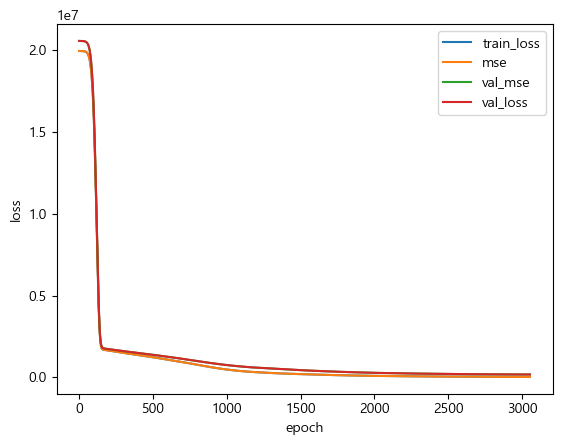

In [114]:
plt.figure()
plt.plot(history.history["loss"],label="train_loss")
plt.plot(history.history["mse"],label="mse")
plt.plot(history.history["val_mse"],label= "val_mse")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

In [115]:
mse_train = model.evaluate(scaled_deep_train,y_train)
rmse_train = np.sqrt(mse_train[0])
print(rmse_train)

5/5 [==============================] - 0s 3ms/step - loss: 69575.9141 - mse: 69575.9141
263.77246646020507


In [116]:
mse_test = model.evaluate(scaled_deep_test,y_test)
rmse_test = np.sqrt(mse_test[0])
print(rmse_test)

2/2 [==============================] - 0s 4ms/step - loss: 175239.8594 - mse: 175239.8594
418.6166018864995


In [104]:
import folium # 지도 시각화
import json

In [105]:
state_geo = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

In [154]:
m = folium.Map(
location=[37.566345,126.977893],
zoom_start= 11,
tiles="Stamen Terrain")

In [155]:
a = crime_22[["자치구","예측 발생"]]
a.columns = ["name","value"]
folium.Choropleth(
geo_data=state_geo,
data= a,
    key_on="feature.properties.name",
    fill_color="OrRd",
    legend_name="자치구별 범죄 발생량",
    fill_opacity=0.7,
    line_opacity=0.2,
columns=["name","value"],).add_to(m)

In [156]:
locs = {
    "강남구" : (37.504575,127.0305556),
    "강동구" : (37.55030007,127.1258639),
    "강북구" : (37.62695556,127.002000368),
    "강서구" :(37.54815556,126.801675),
    "관악구": (37.45538611,126.9558444),
    "광진구" : (37.54573889,127.069),
    "구로구" : (37.49265,126.8307083),
    "금천구" :(37.44910833,126.8951972),
    "노원구" : (37.65146111,127.0583889),
    "도봉구" : (37.673039839, 127.013480368),
    "동대문구" :(37.571625,127.0321417),
    "동작구" : (37.49833556,126.941575),
    "마포구" :(37.55870556,126.8865306),
    "서대문구" : (37.56936667,126.9188972),
    "서초구" :(37.48078611,126.9851234),
    "성동구" : (37.54573889,127.0205333),
    "성북구" : (37.59138333,127.0003333),
    "송파구" : (37.51175556,127.0879306),
    "양천구" : (37.51423056,126.8407083),
    "영등포구" : (37.52361111,126.8983417), 
    "용산구" : (37.53609444,126.9675222),
    "은평구" : (37.59986944,126.9055306),
    "종로구" : (37.58037778,126.9616417),
    "중구" : (37.55800278,126.9816417),
    "중랑구" : (37.60180556,127.0747778),
}

In [157]:
for key, value in locs.items():
    folium.map.Marker(
    [value[0],value[1]],
    icon=folium.DivIcon(
    html='<div style="\
                        font-size: 0.8rem;\
                        color: black;\
                        width:45px;\
                        text-align:center;\
                        margin:0px;\
                    "><b>' + key +'</b></div>')
    ).add_to(m)

In [158]:
m